# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

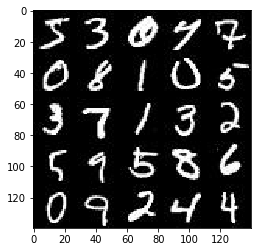

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

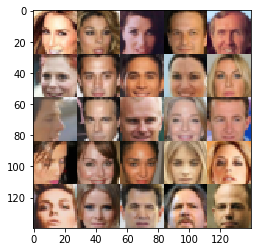

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0


C:\Anaconda3\envs\face_generation\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print(z_dim)
    input_images = \
        tf.placeholder\
            (tf.float32, 
             [None,image_width,image_height,image_channels], 
             'input_images')
    z_data = tf.placeholder(tf.float32, [None,z_dim], 'z_data')
    learning_rate = tf.placeholder(tf.float32, [], 'learning_rate')

    return input_images, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def leaky_RELU(t, alpha=.2):
    return tf.maximum(alpha*t, t)

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #images_shape = images.get_shape().as_list()[1:]
    #print_shape = lambda t: print(t.get_shape().as_list()[1:])
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input is 28x28x3
        #print_shape(images)
        conv1 = \
            tf.layers.conv2d\
                (images, 64, kernel_size=5, strides=2, padding='same')
        conv1 = leaky_RELU(conv1)
        #print_shape(conv1)
        # Now 14x14x64
        conv2 = \
            tf.layers.conv2d\
                (conv1, 128, kernel_size=5, strides=2, padding='same')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = leaky_RELU(conv2)
        #print_shape(conv2)
        # Now 7x7x128
        conv3 = \
            tf.layers.conv2d\
                (conv2, 256, kernel_size=5, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = leaky_RELU(conv3)
        #print_shape(conv3)
        # Now 4x4x256
        flatten = tf.contrib.layers.flatten(conv3)
        logits = tf.layers.dense(flatten, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        fc = tf.layers.dense(inputs=z, units=4*4*512)
        fc = tf.reshape(fc, [-1,4,4,512])
        fc = tf.layers.batch_normalization(fc, training=is_train)
        #fc = leaky_RELU(fc)
        fc = tf.nn.relu(fc)
        # Now 4x4x512
        conv1 = tf.image.resize_nearest_neighbor(fc, (8,8))
        conv1 = tf.layers.conv2d(conv1, 256, kernel_size=3, padding='same')
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        #conv1 = leaky_RELU(conv1)
        conv1 = tf.nn.relu(conv1)
        # Now 8x8x256
        conv2 = tf.image.resize_nearest_neighbor(conv1, (16,16))
        conv2 = tf.layers.conv2d(conv2, 128, kernel_size=3, padding='same')
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        #conv2 = leaky_RELU(conv2)
        conv2 = tf.nn.relu(conv2)
        # Now 16x16x128
        conv3 = tf.image.resize_nearest_neighbor(conv2, (28,28))
        conv3 = \
            tf.layers.conv2d\
                (conv3, out_channel_dim, kernel_size=3, padding='same')
        out = tf.tanh(conv3)
        #Now 28x28xout_channel_dim
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_out = generator(input_z, out_channel_dim)
    d_real_out, d_real_logits = discriminator(input_real)
    d_fake_out, d_fake_logits = discriminator(g_out, reuse=True)
    
    g_loss = \
        tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits\
            (logits=d_fake_logits, labels=tf.ones_like(d_fake_out)))
    d_real_loss = \
        tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits\
            (logits=d_real_logits, 
             labels=tf.ones_like(d_real_out) * (1 - smooth)))
    d_fake_loss = \
        tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits\
            (logits=d_fake_logits, labels=tf.zeros_like(d_fake_out)))
    d_loss = d_real_loss + d_fake_loss 
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    trainable_vars_in_scope = lambda scope_name: \
        [var for var in t_vars if var.name.startswith(scope_name)]
    d_vars = trainable_vars_in_scope('discriminator')
    g_vars = trainable_vars_in_scope('generator')
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = lambda loss, var_list: \
            tf.train.AdamOptimizer\
                (learning_rate, beta1=beta1).minimize(loss=loss, 
                                                      var_list=var_list)
        d_optimizer = optimizer(d_loss, d_vars)
        g_optimizer = optimizer(g_loss, g_vars)
            
    
    return d_optimizer, g_optimizer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()   
    #image_channels = 3 if data_image_mode == "RGB" else 1
    image_width, image_height, image_channels = data_shape[1:]
    #print(image_width, image_height, image_channels)
    input_images, z_data, rate = \
        model_inputs\
            (image_width=image_width, 
             image_height=image_height, 
             image_channels=image_channels, 
             z_dim=z_dim)
    
    d_loss, g_loss = \
        model_loss(input_images, z_data, image_channels)
    d_optimizer, g_optimizer = \
        model_opt(d_loss, g_loss, rate, beta1)
        
    #sample_z = np.random.uniform(-0.5, 0.5, size=(72, z_dim))
    #samples, losses = [], []
    steps = 0
    print_every = 10
    show_every = 10
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = \
                    np.random.uniform(-1, 1, size=[batch_size, z_dim])
                # Run optimizers
                _ = sess.run(d_optimizer, 
                             feed_dict={input_images: batch_images, 
                                        z_data: batch_z,
                                        rate: learning_rate})
                _ = sess.run(g_optimizer, 
                             feed_dict={input_images: batch_images, 
                                        z_data: batch_z,
                                        rate: learning_rate})
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = \
                        d_loss.eval({input_images: batch_images, 
                                     z_data: batch_z})
                    train_loss_g = \
                        g_loss.eval({z_data: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    #losses.append((train_loss_d, train_loss_g))
                if steps % show_every == 0:
                    show_generator_output\
                        (sess, 
                         n_images=15, 
                         input_z=z_data, 
                         out_channel_dim=image_channels, 
                         image_mode=data_image_mode)
        saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.6209... Generator Loss: 0.2154


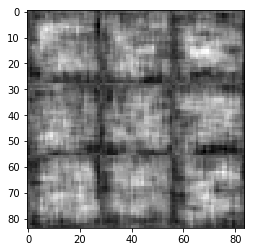

Epoch 1/2... Discriminator Loss: 2.2775... Generator Loss: 0.2138


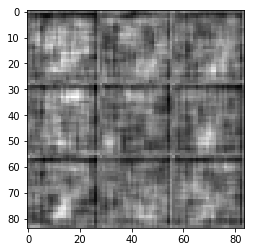

Epoch 1/2... Discriminator Loss: 1.5389... Generator Loss: 0.4630


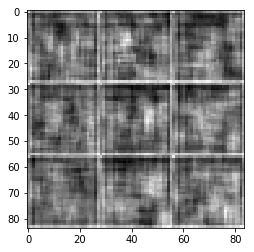

Epoch 1/2... Discriminator Loss: 1.5317... Generator Loss: 0.5336


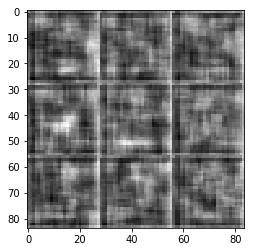

Epoch 1/2... Discriminator Loss: 0.9797... Generator Loss: 2.3174


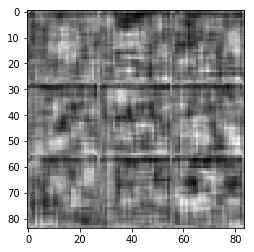

Epoch 1/2... Discriminator Loss: 1.8697... Generator Loss: 0.4893


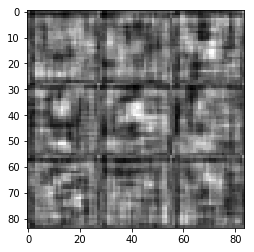

Epoch 1/2... Discriminator Loss: 1.4670... Generator Loss: 0.5536


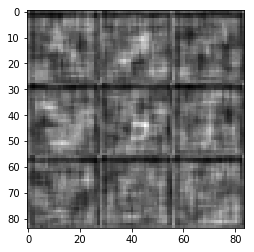

Epoch 1/2... Discriminator Loss: 0.7977... Generator Loss: 1.2461


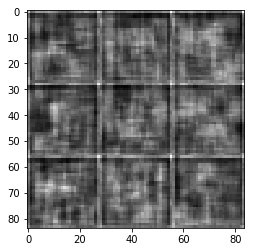

Epoch 1/2... Discriminator Loss: 1.4158... Generator Loss: 0.5221


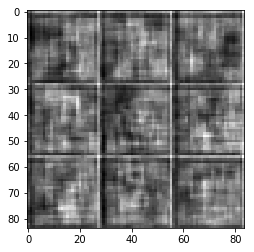

Epoch 1/2... Discriminator Loss: 0.6813... Generator Loss: 1.6634


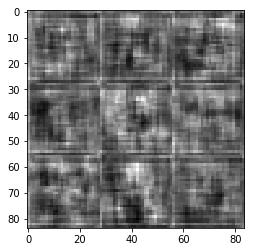

Epoch 1/2... Discriminator Loss: 1.8316... Generator Loss: 0.3665


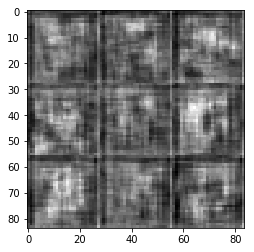

Epoch 1/2... Discriminator Loss: 0.5515... Generator Loss: 2.2840


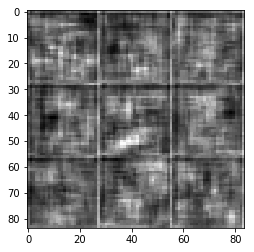

Epoch 1/2... Discriminator Loss: 0.6324... Generator Loss: 1.5601


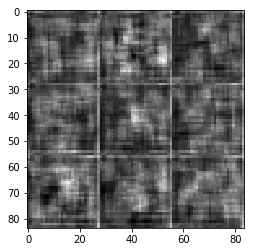

Epoch 1/2... Discriminator Loss: 0.5305... Generator Loss: 1.9656


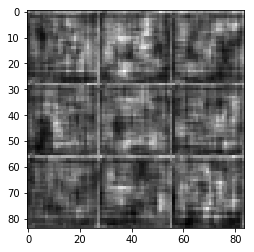

Epoch 1/2... Discriminator Loss: 0.5523... Generator Loss: 2.7899


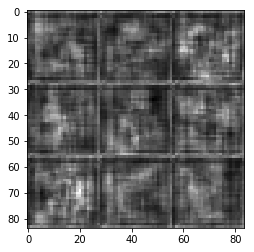

Epoch 1/2... Discriminator Loss: 0.5625... Generator Loss: 1.8302


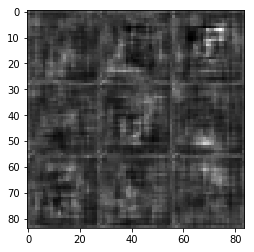

Epoch 1/2... Discriminator Loss: 0.5158... Generator Loss: 1.9568


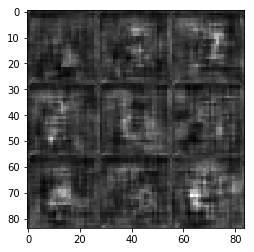

Epoch 1/2... Discriminator Loss: 1.1628... Generator Loss: 0.7210


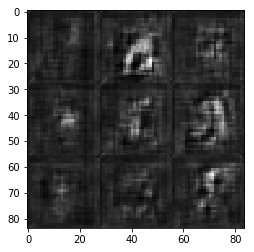

Epoch 1/2... Discriminator Loss: 1.3317... Generator Loss: 7.2074


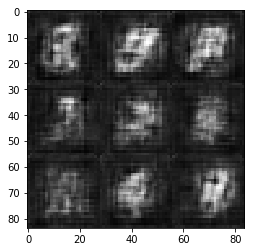

Epoch 1/2... Discriminator Loss: 0.5645... Generator Loss: 2.1150


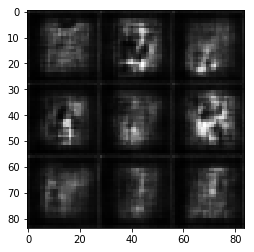

Epoch 1/2... Discriminator Loss: 0.8027... Generator Loss: 1.4162


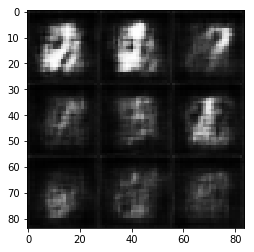

Epoch 1/2... Discriminator Loss: 0.7210... Generator Loss: 1.2800


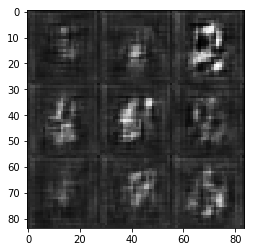

Epoch 1/2... Discriminator Loss: 0.3986... Generator Loss: 3.4170


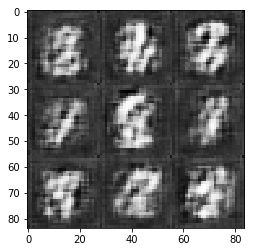

Epoch 1/2... Discriminator Loss: 0.5781... Generator Loss: 2.9434


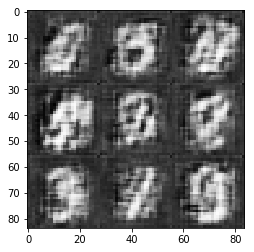

Epoch 1/2... Discriminator Loss: 0.8498... Generator Loss: 1.2268


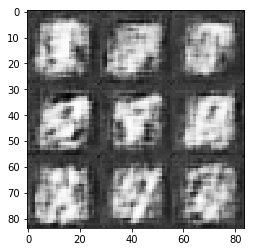

Epoch 1/2... Discriminator Loss: 0.4991... Generator Loss: 2.7127


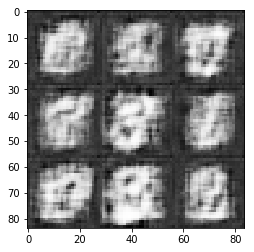

Epoch 1/2... Discriminator Loss: 0.4588... Generator Loss: 3.5799


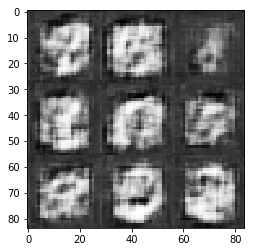

Epoch 1/2... Discriminator Loss: 1.0323... Generator Loss: 0.8046


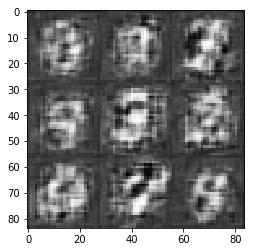

Epoch 1/2... Discriminator Loss: 0.3945... Generator Loss: 4.5145


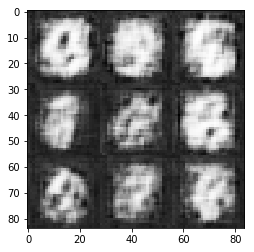

Epoch 1/2... Discriminator Loss: 0.5780... Generator Loss: 1.7803


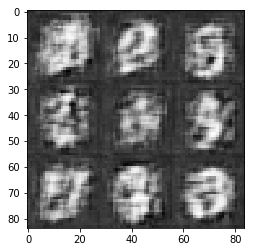

Epoch 1/2... Discriminator Loss: 0.7085... Generator Loss: 2.4718


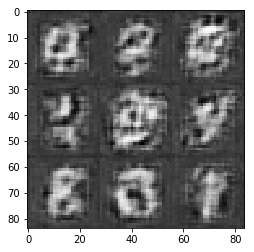

Epoch 1/2... Discriminator Loss: 0.7961... Generator Loss: 1.3105


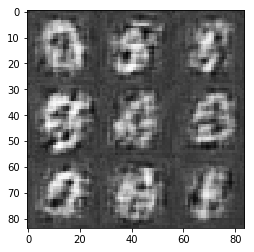

Epoch 1/2... Discriminator Loss: 0.6959... Generator Loss: 1.8597


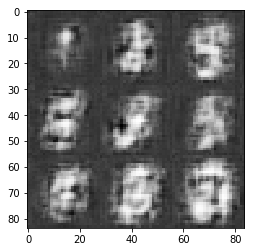

Epoch 1/2... Discriminator Loss: 0.9438... Generator Loss: 1.0349


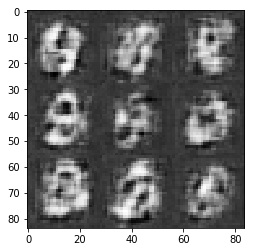

Epoch 1/2... Discriminator Loss: 0.6277... Generator Loss: 1.5891


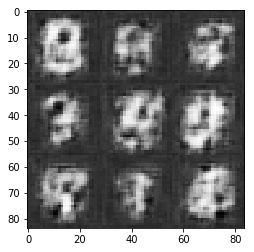

Epoch 1/2... Discriminator Loss: 0.7354... Generator Loss: 1.2387


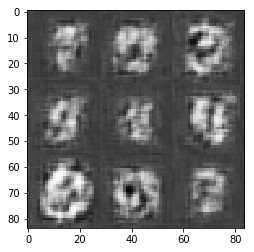

Epoch 1/2... Discriminator Loss: 0.5893... Generator Loss: 2.1321


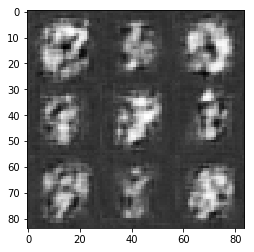

Epoch 1/2... Discriminator Loss: 0.6068... Generator Loss: 1.6291


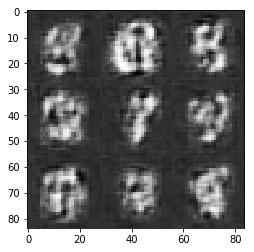

Epoch 1/2... Discriminator Loss: 0.5841... Generator Loss: 1.7440


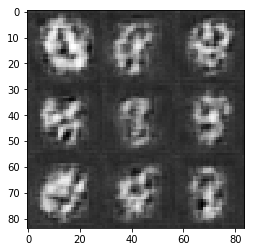

Epoch 1/2... Discriminator Loss: 0.6628... Generator Loss: 1.5199


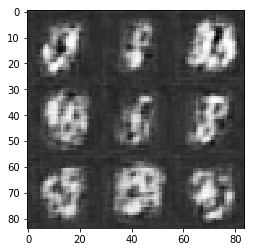

Epoch 1/2... Discriminator Loss: 2.4583... Generator Loss: 0.1799


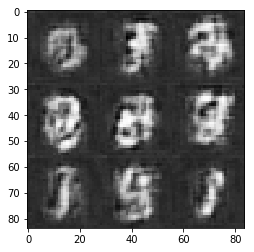

Epoch 1/2... Discriminator Loss: 0.6688... Generator Loss: 1.6391


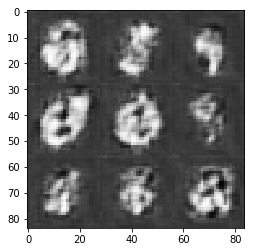

Epoch 1/2... Discriminator Loss: 0.6953... Generator Loss: 1.3673


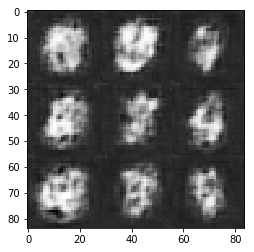

Epoch 1/2... Discriminator Loss: 1.3589... Generator Loss: 0.5701


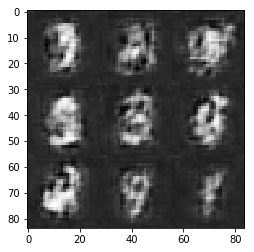

Epoch 1/2... Discriminator Loss: 0.5838... Generator Loss: 1.7076


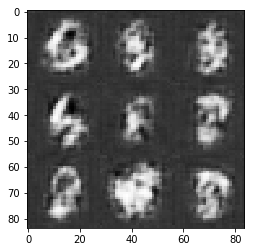

Epoch 1/2... Discriminator Loss: 0.6003... Generator Loss: 1.8640


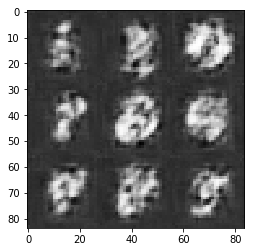

Epoch 1/2... Discriminator Loss: 0.5167... Generator Loss: 2.1598


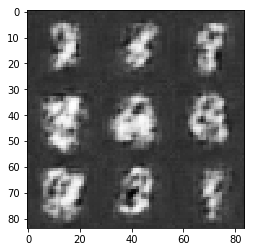

Epoch 1/2... Discriminator Loss: 0.5042... Generator Loss: 2.2013


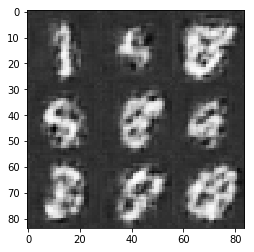

Epoch 1/2... Discriminator Loss: 0.5190... Generator Loss: 2.0537


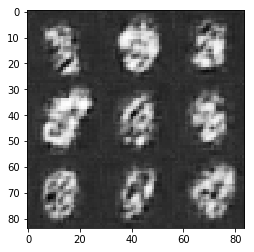

Epoch 1/2... Discriminator Loss: 0.4555... Generator Loss: 2.5133


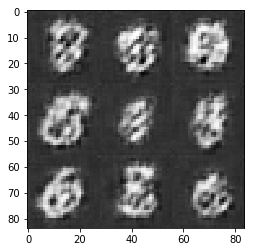

Epoch 1/2... Discriminator Loss: 0.7207... Generator Loss: 1.2367


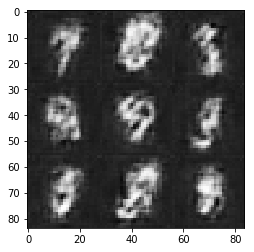

Epoch 1/2... Discriminator Loss: 0.4958... Generator Loss: 2.1159


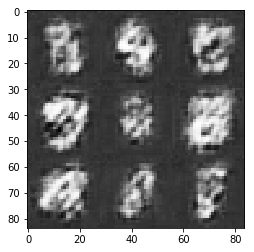

Epoch 1/2... Discriminator Loss: 0.4268... Generator Loss: 2.7670


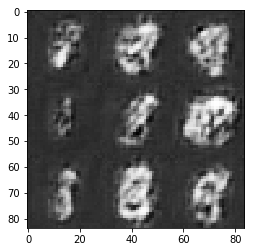

Epoch 1/2... Discriminator Loss: 0.4547... Generator Loss: 2.9833


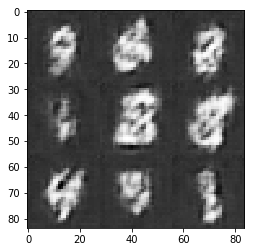

Epoch 1/2... Discriminator Loss: 0.5325... Generator Loss: 2.1144


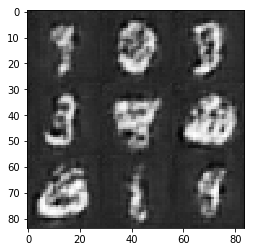

Epoch 1/2... Discriminator Loss: 0.6216... Generator Loss: 1.6105


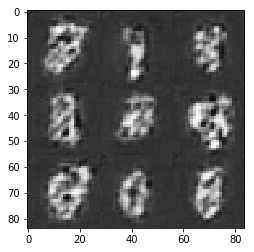

Epoch 1/2... Discriminator Loss: 0.5081... Generator Loss: 2.1196


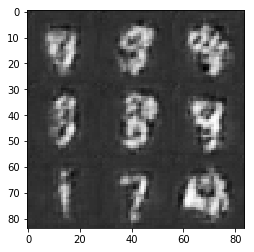

Epoch 1/2... Discriminator Loss: 0.5632... Generator Loss: 1.8085


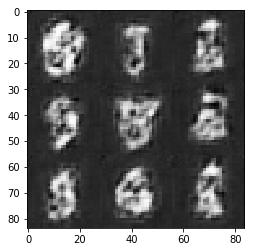

Epoch 1/2... Discriminator Loss: 0.4466... Generator Loss: 2.6476


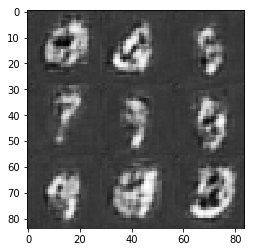

Epoch 1/2... Discriminator Loss: 0.4397... Generator Loss: 2.7081


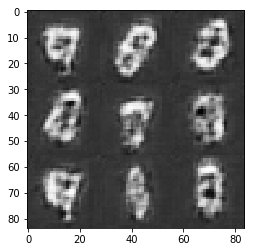

Epoch 1/2... Discriminator Loss: 0.4517... Generator Loss: 2.7502


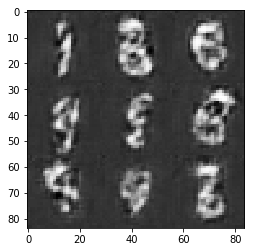

Epoch 1/2... Discriminator Loss: 0.4882... Generator Loss: 2.1621


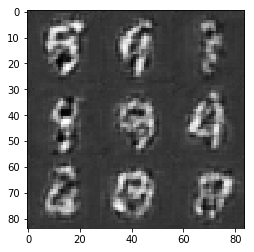

Epoch 1/2... Discriminator Loss: 1.0347... Generator Loss: 0.8632


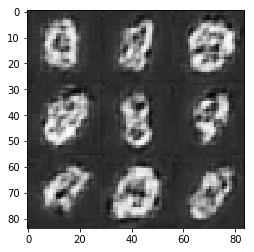

Epoch 1/2... Discriminator Loss: 0.6697... Generator Loss: 1.5317


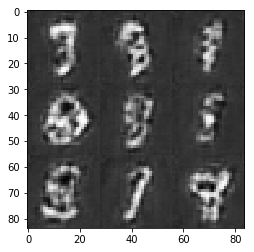

Epoch 1/2... Discriminator Loss: 2.3588... Generator Loss: 0.9512


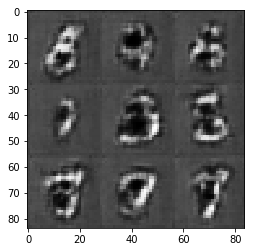

Epoch 1/2... Discriminator Loss: 0.5965... Generator Loss: 1.7161


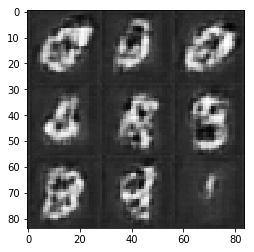

Epoch 1/2... Discriminator Loss: 0.6849... Generator Loss: 1.3329


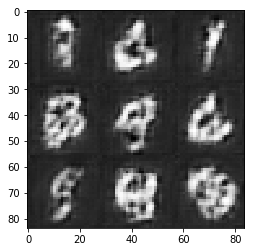

Epoch 1/2... Discriminator Loss: 0.5657... Generator Loss: 1.7214


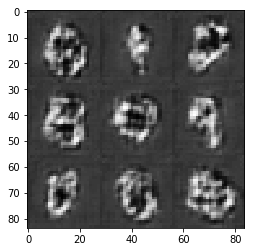

Epoch 1/2... Discriminator Loss: 0.4376... Generator Loss: 2.6395


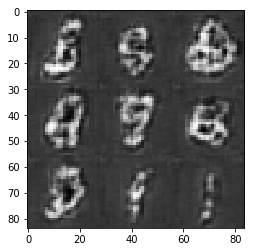

Epoch 1/2... Discriminator Loss: 0.3798... Generator Loss: 3.3860


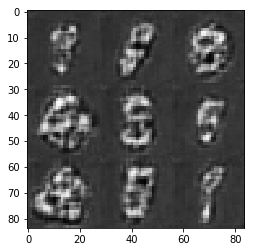

Epoch 1/2... Discriminator Loss: 0.3657... Generator Loss: 3.5903


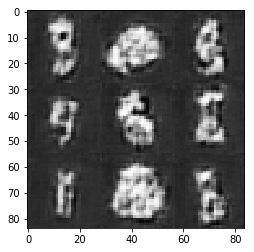

Epoch 1/2... Discriminator Loss: 0.4362... Generator Loss: 2.5194


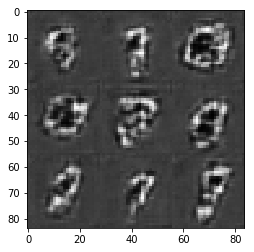

Epoch 1/2... Discriminator Loss: 0.3539... Generator Loss: 5.0002


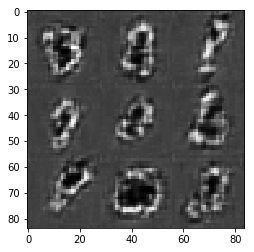

Epoch 1/2... Discriminator Loss: 0.3767... Generator Loss: 3.4305


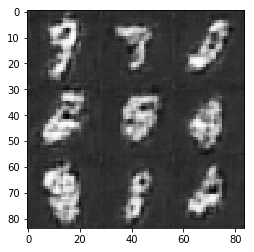

Epoch 1/2... Discriminator Loss: 0.4671... Generator Loss: 2.1866


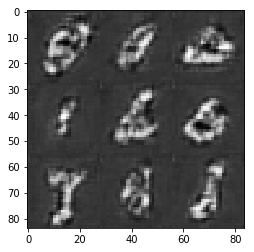

Epoch 1/2... Discriminator Loss: 0.4497... Generator Loss: 2.4051


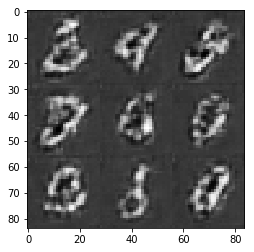

Epoch 1/2... Discriminator Loss: 0.5515... Generator Loss: 1.7682


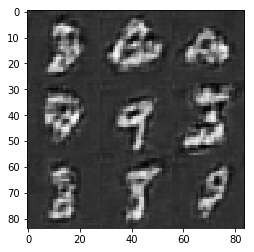

Epoch 1/2... Discriminator Loss: 0.4399... Generator Loss: 2.6764


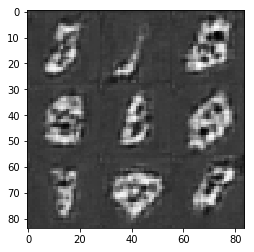

Epoch 1/2... Discriminator Loss: 0.3519... Generator Loss: 4.6676


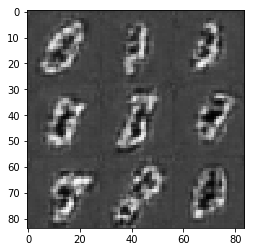

Epoch 1/2... Discriminator Loss: 0.8353... Generator Loss: 1.1305


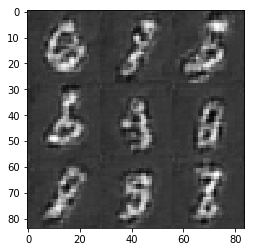

Epoch 1/2... Discriminator Loss: 0.3372... Generator Loss: 5.3845


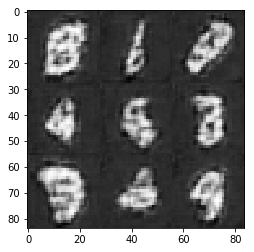

Epoch 1/2... Discriminator Loss: 0.3763... Generator Loss: 3.3451


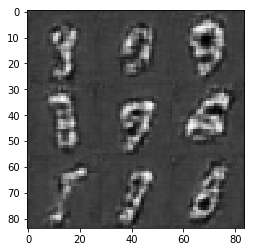

Epoch 1/2... Discriminator Loss: 0.3618... Generator Loss: 6.0547


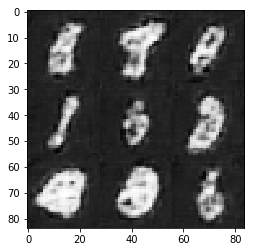

Epoch 1/2... Discriminator Loss: 0.3575... Generator Loss: 3.9089


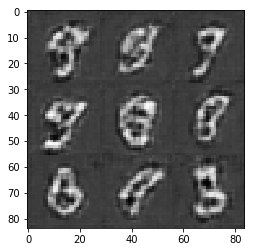

Epoch 1/2... Discriminator Loss: 0.3682... Generator Loss: 6.8516


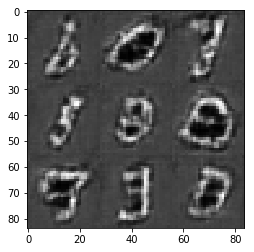

Epoch 1/2... Discriminator Loss: 0.3559... Generator Loss: 4.7051


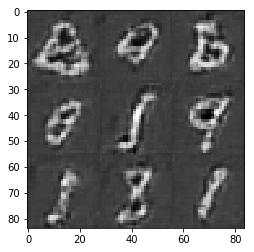

Epoch 1/2... Discriminator Loss: 0.9332... Generator Loss: 0.9753


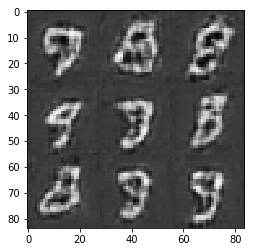

Epoch 1/2... Discriminator Loss: 0.7758... Generator Loss: 1.3861


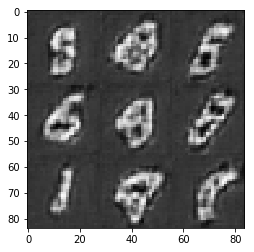

Epoch 1/2... Discriminator Loss: 0.8050... Generator Loss: 1.2108


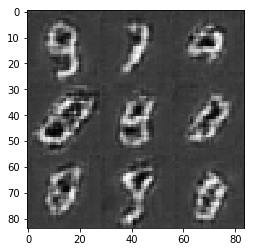

Epoch 1/2... Discriminator Loss: 0.4201... Generator Loss: 6.3262


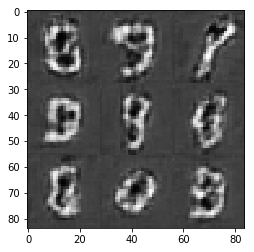

Epoch 1/2... Discriminator Loss: 3.4569... Generator Loss: 0.2532


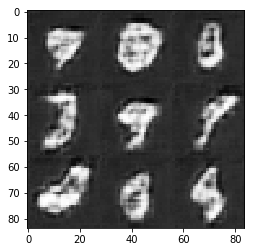

Epoch 1/2... Discriminator Loss: 0.6047... Generator Loss: 2.1449


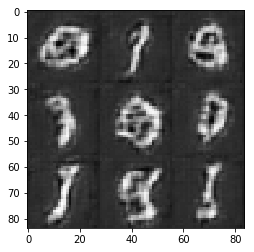

Epoch 1/2... Discriminator Loss: 0.6159... Generator Loss: 1.5581


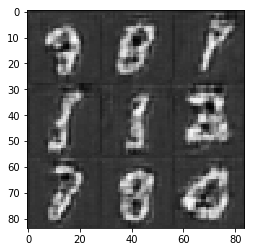

Epoch 1/2... Discriminator Loss: 0.6467... Generator Loss: 1.5817


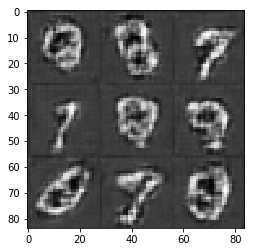

Epoch 1/2... Discriminator Loss: 0.5636... Generator Loss: 1.9323


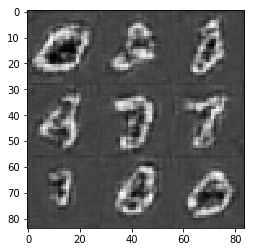

Epoch 1/2... Discriminator Loss: 0.5585... Generator Loss: 1.8528


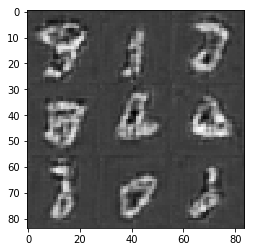

Epoch 1/2... Discriminator Loss: 0.4096... Generator Loss: 3.0736


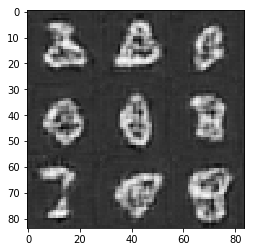

Epoch 1/2... Discriminator Loss: 0.3458... Generator Loss: 5.3018


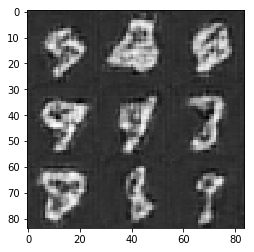

Epoch 1/2... Discriminator Loss: 0.3409... Generator Loss: 5.3456


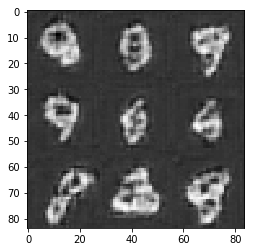

Epoch 1/2... Discriminator Loss: 0.4900... Generator Loss: 2.0977


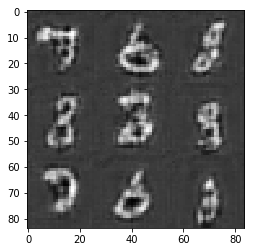

Epoch 1/2... Discriminator Loss: 0.3536... Generator Loss: 4.4617


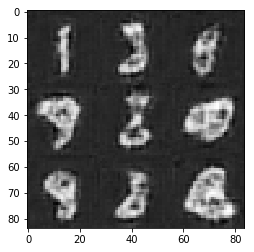

Epoch 1/2... Discriminator Loss: 0.4621... Generator Loss: 5.0163


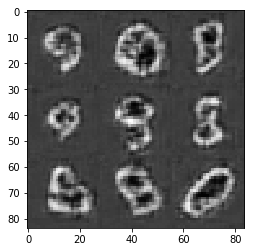

Epoch 1/2... Discriminator Loss: 1.1737... Generator Loss: 0.7282


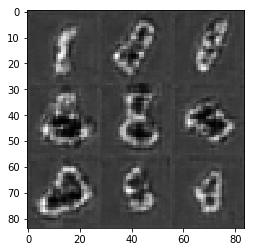

Epoch 1/2... Discriminator Loss: 0.4458... Generator Loss: 2.5129


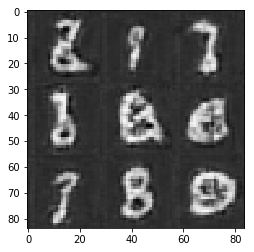

Epoch 1/2... Discriminator Loss: 0.3594... Generator Loss: 4.3490


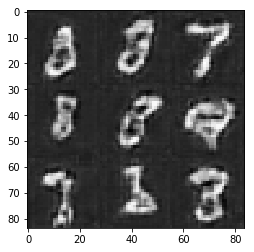

Epoch 1/2... Discriminator Loss: 0.4119... Generator Loss: 2.7965


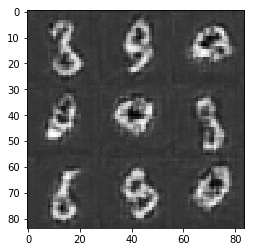

Epoch 1/2... Discriminator Loss: 0.3822... Generator Loss: 3.2606


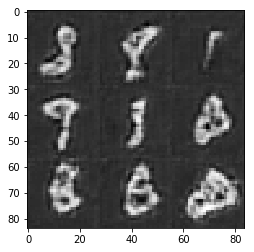

Epoch 1/2... Discriminator Loss: 0.3750... Generator Loss: 3.4578


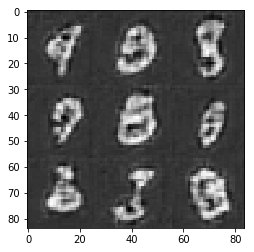

Epoch 1/2... Discriminator Loss: 0.4209... Generator Loss: 2.7301


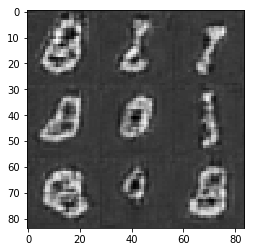

Epoch 1/2... Discriminator Loss: 0.4208... Generator Loss: 2.6845


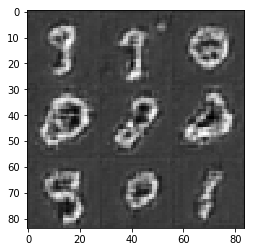

Epoch 1/2... Discriminator Loss: 0.5908... Generator Loss: 3.6092


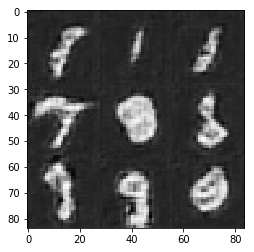

Epoch 1/2... Discriminator Loss: 0.4383... Generator Loss: 2.5533


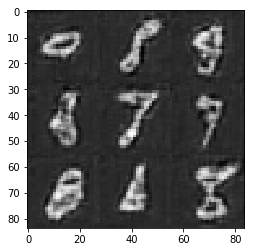

Epoch 1/2... Discriminator Loss: 0.3965... Generator Loss: 2.8273


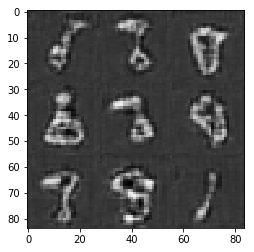

Epoch 1/2... Discriminator Loss: 1.2350... Generator Loss: 0.8182


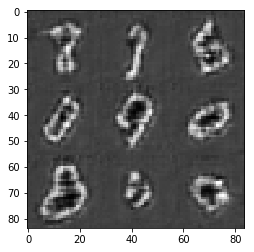

Epoch 1/2... Discriminator Loss: 1.4196... Generator Loss: 0.6301


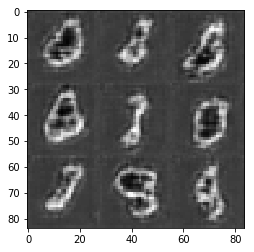

Epoch 1/2... Discriminator Loss: 0.5373... Generator Loss: 2.0739


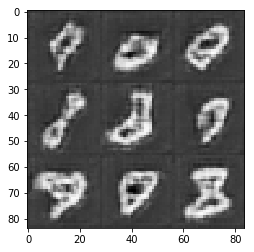

Epoch 1/2... Discriminator Loss: 0.6352... Generator Loss: 1.5518


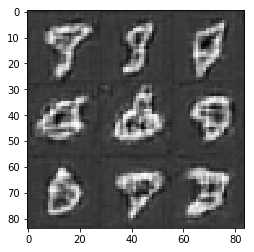

Epoch 1/2... Discriminator Loss: 0.3944... Generator Loss: 3.0771


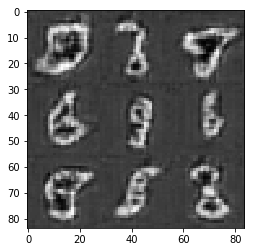

Epoch 1/2... Discriminator Loss: 0.3683... Generator Loss: 3.5342


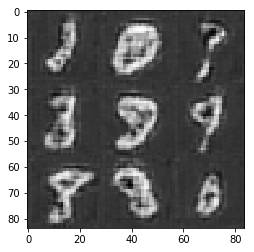

Epoch 1/2... Discriminator Loss: 0.3439... Generator Loss: 5.0303


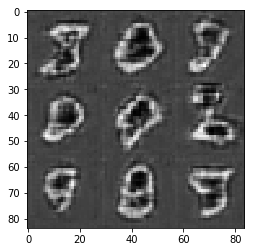

Epoch 1/2... Discriminator Loss: 0.4260... Generator Loss: 2.6750


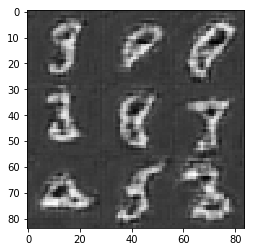

Epoch 1/2... Discriminator Loss: 0.3949... Generator Loss: 2.9953


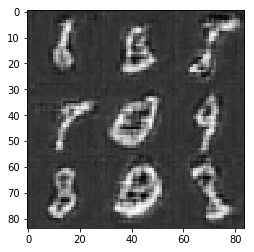

Epoch 1/2... Discriminator Loss: 0.4707... Generator Loss: 2.2114


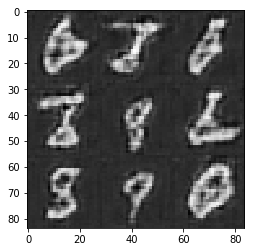

Epoch 1/2... Discriminator Loss: 0.4342... Generator Loss: 2.4359


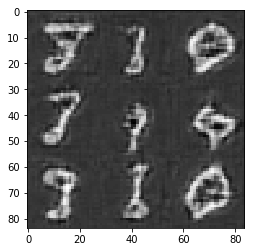

Epoch 1/2... Discriminator Loss: 0.3532... Generator Loss: 4.4806


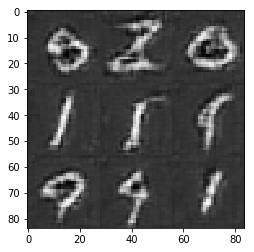

Epoch 1/2... Discriminator Loss: 0.4538... Generator Loss: 2.5156


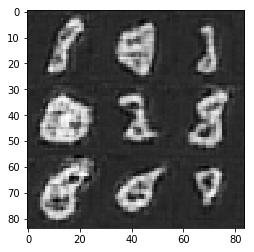

Epoch 1/2... Discriminator Loss: 0.3882... Generator Loss: 3.0036


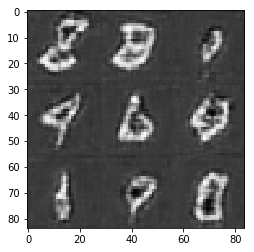

Epoch 1/2... Discriminator Loss: 0.3499... Generator Loss: 4.0963


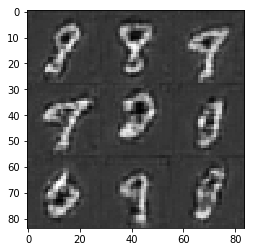

Epoch 1/2... Discriminator Loss: 0.3600... Generator Loss: 3.7188


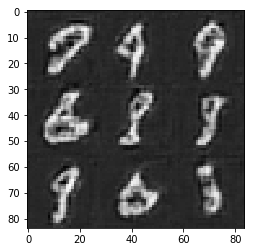

Epoch 1/2... Discriminator Loss: 0.4405... Generator Loss: 2.4915


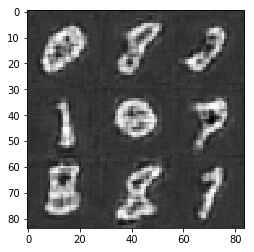

Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 3.1575


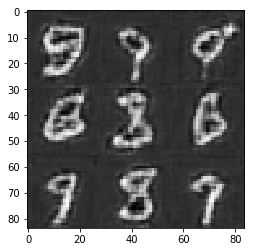

Epoch 1/2... Discriminator Loss: 0.4345... Generator Loss: 2.4998


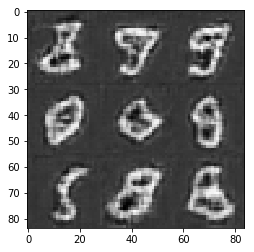

Epoch 1/2... Discriminator Loss: 0.5845... Generator Loss: 1.6590


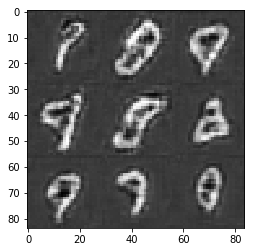

Epoch 1/2... Discriminator Loss: 0.4319... Generator Loss: 2.5504


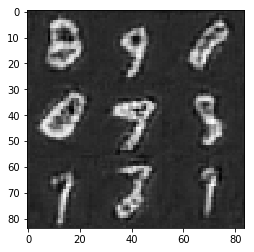

Epoch 1/2... Discriminator Loss: 4.1208... Generator Loss: 0.0490


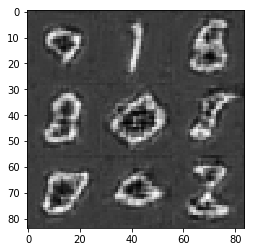

Epoch 1/2... Discriminator Loss: 0.5379... Generator Loss: 1.9927


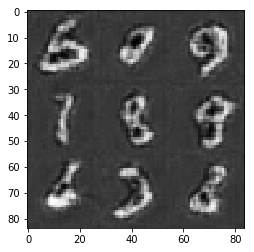

Epoch 1/2... Discriminator Loss: 0.4544... Generator Loss: 2.3140


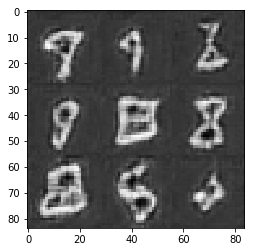

Epoch 1/2... Discriminator Loss: 0.3762... Generator Loss: 3.3907


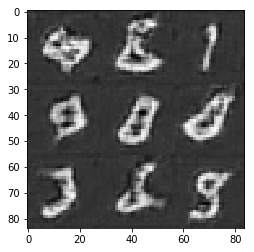

Epoch 1/2... Discriminator Loss: 0.3613... Generator Loss: 3.9968


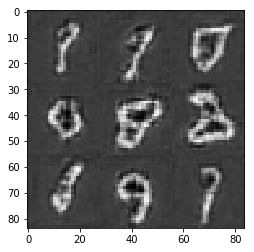

Epoch 1/2... Discriminator Loss: 0.3544... Generator Loss: 4.3728


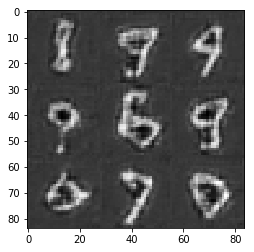

Epoch 1/2... Discriminator Loss: 0.5294... Generator Loss: 1.8688


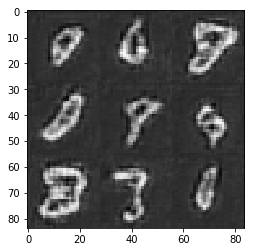

Epoch 1/2... Discriminator Loss: 0.3526... Generator Loss: 4.2027


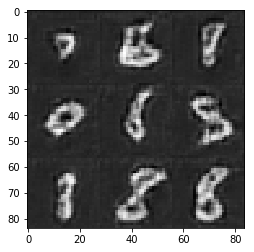

Epoch 1/2... Discriminator Loss: 0.3656... Generator Loss: 4.1624


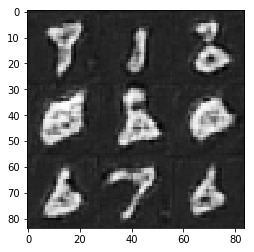

Epoch 1/2... Discriminator Loss: 0.3780... Generator Loss: 3.6881


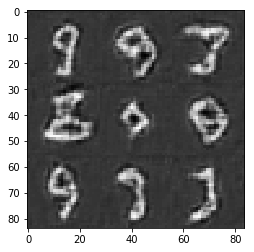

Epoch 1/2... Discriminator Loss: 0.3714... Generator Loss: 3.4351


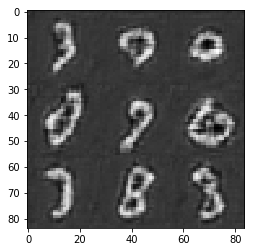

Epoch 1/2... Discriminator Loss: 0.3370... Generator Loss: 5.0951


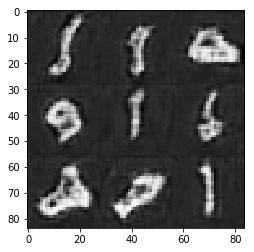

Epoch 1/2... Discriminator Loss: 0.4149... Generator Loss: 2.6874


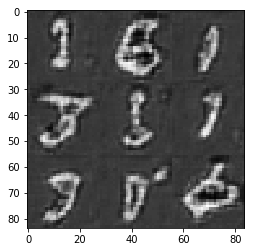

Epoch 1/2... Discriminator Loss: 0.4292... Generator Loss: 2.6531


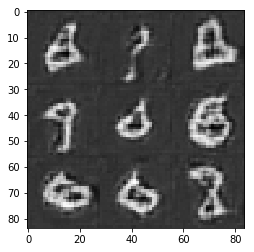

Epoch 1/2... Discriminator Loss: 0.3451... Generator Loss: 5.1207


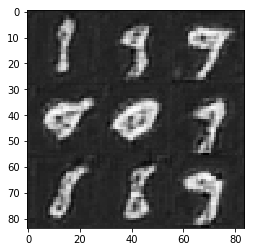

Epoch 1/2... Discriminator Loss: 0.3494... Generator Loss: 4.4439


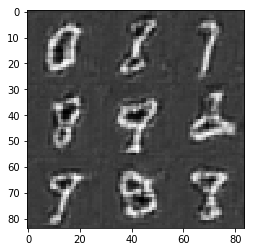

Epoch 1/2... Discriminator Loss: 0.4033... Generator Loss: 2.8863


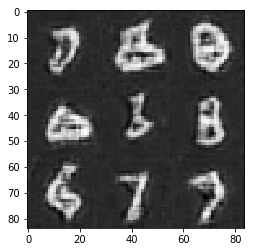

Epoch 1/2... Discriminator Loss: 0.3525... Generator Loss: 4.0852


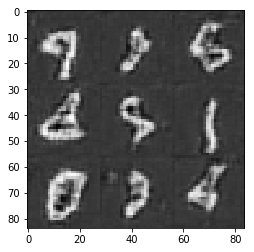

Epoch 1/2... Discriminator Loss: 0.4690... Generator Loss: 2.1780


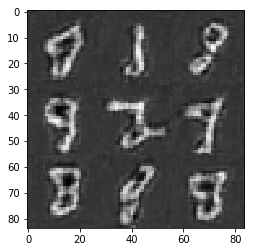

Epoch 1/2... Discriminator Loss: 0.3621... Generator Loss: 4.7466


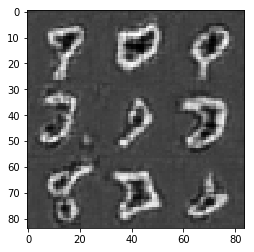

Epoch 1/2... Discriminator Loss: 0.3410... Generator Loss: 4.8924


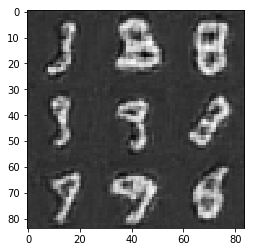

Epoch 1/2... Discriminator Loss: 0.3960... Generator Loss: 2.9964


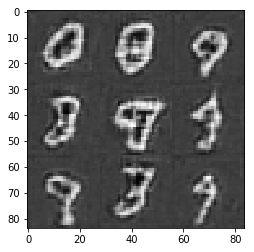

Epoch 1/2... Discriminator Loss: 0.4725... Generator Loss: 2.3074


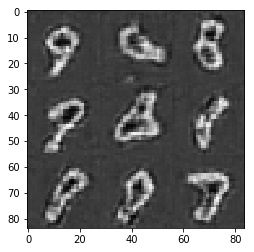

Epoch 1/2... Discriminator Loss: 0.3763... Generator Loss: 3.3191


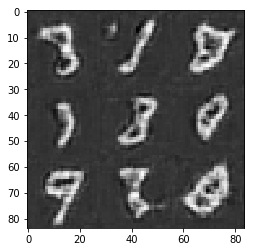

Epoch 1/2... Discriminator Loss: 0.8674... Generator Loss: 1.5509


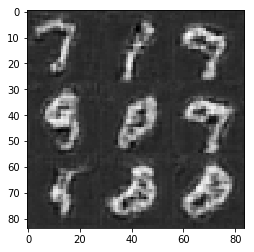

Epoch 1/2... Discriminator Loss: 0.5532... Generator Loss: 2.1821


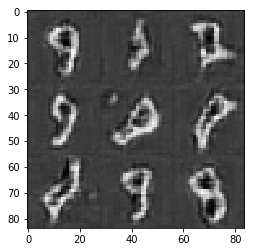

Epoch 1/2... Discriminator Loss: 0.4718... Generator Loss: 3.1165


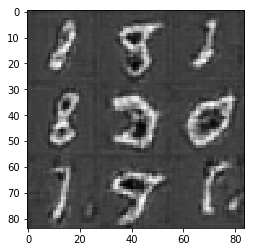

Epoch 1/2... Discriminator Loss: 0.3679... Generator Loss: 3.6237


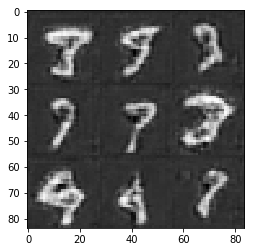

Epoch 1/2... Discriminator Loss: 0.3499... Generator Loss: 4.1683


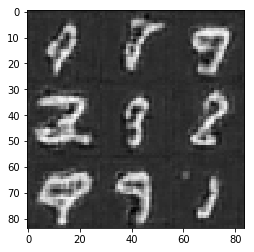

Epoch 1/2... Discriminator Loss: 0.5168... Generator Loss: 2.0124


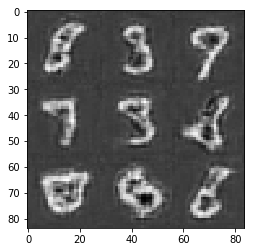

Epoch 1/2... Discriminator Loss: 0.4023... Generator Loss: 4.5877


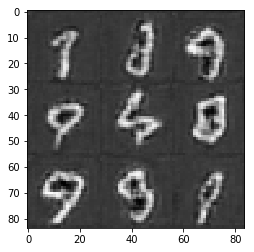

Epoch 1/2... Discriminator Loss: 0.4228... Generator Loss: 2.7659


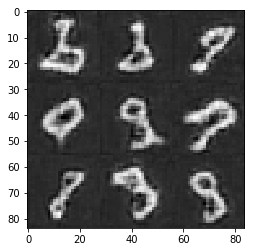

Epoch 1/2... Discriminator Loss: 0.4280... Generator Loss: 2.6900


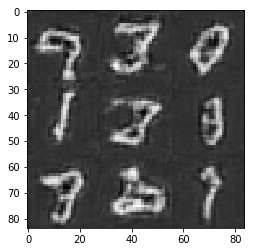

Epoch 1/2... Discriminator Loss: 1.1513... Generator Loss: 0.6597


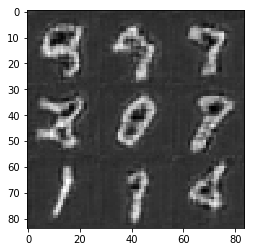

Epoch 1/2... Discriminator Loss: 0.4461... Generator Loss: 4.7798


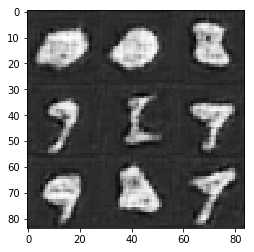

Epoch 1/2... Discriminator Loss: 0.6220... Generator Loss: 2.8792


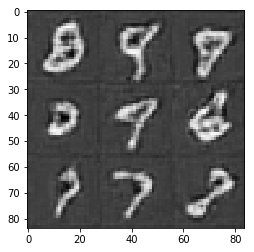

Epoch 1/2... Discriminator Loss: 0.6453... Generator Loss: 3.5596


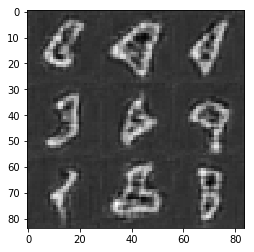

Epoch 1/2... Discriminator Loss: 0.4406... Generator Loss: 2.7650


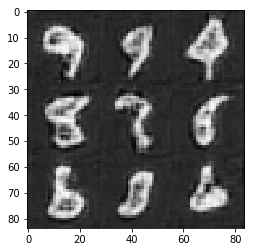

Epoch 1/2... Discriminator Loss: 0.5384... Generator Loss: 2.3054


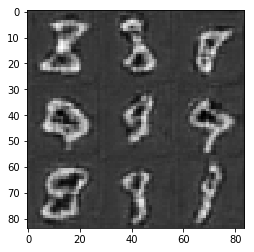

Epoch 1/2... Discriminator Loss: 0.8709... Generator Loss: 1.0551


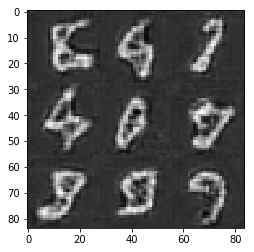

Epoch 1/2... Discriminator Loss: 0.5869... Generator Loss: 1.9337


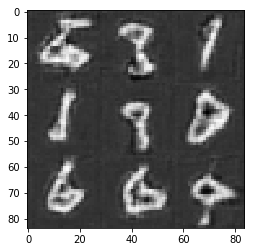

Epoch 1/2... Discriminator Loss: 1.2186... Generator Loss: 0.7008


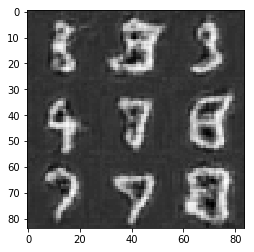

Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 1.8759


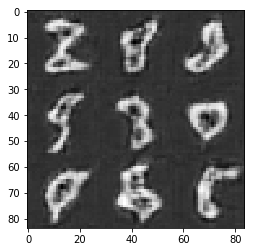

Epoch 1/2... Discriminator Loss: 0.4550... Generator Loss: 2.4376


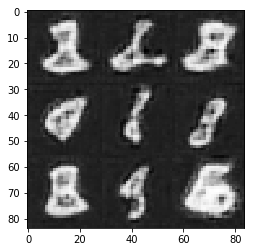

Epoch 1/2... Discriminator Loss: 0.3523... Generator Loss: 4.1809


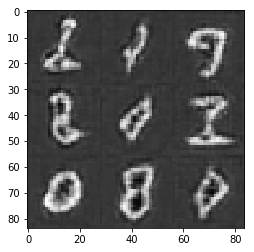

Epoch 1/2... Discriminator Loss: 0.4701... Generator Loss: 2.1974


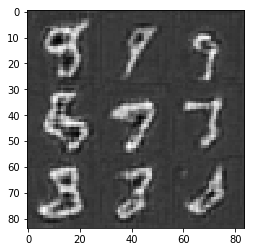

Epoch 1/2... Discriminator Loss: 0.3443... Generator Loss: 4.7469


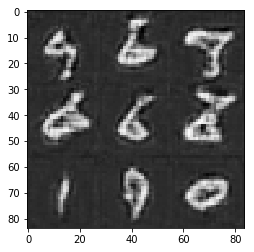

Epoch 1/2... Discriminator Loss: 0.4465... Generator Loss: 2.3769


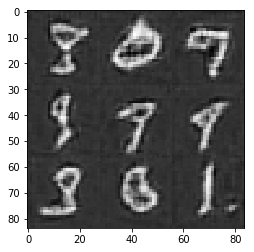

Epoch 1/2... Discriminator Loss: 0.4533... Generator Loss: 2.5006


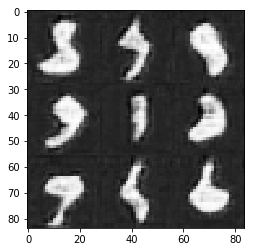

Epoch 1/2... Discriminator Loss: 0.4872... Generator Loss: 2.5536


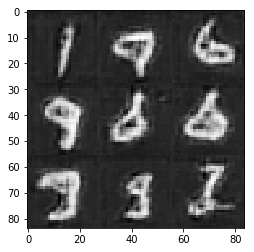

Epoch 1/2... Discriminator Loss: 0.4628... Generator Loss: 2.2962


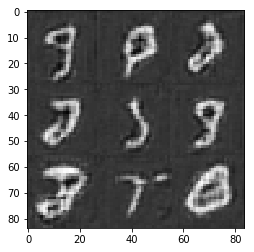

Epoch 1/2... Discriminator Loss: 0.3602... Generator Loss: 3.6614


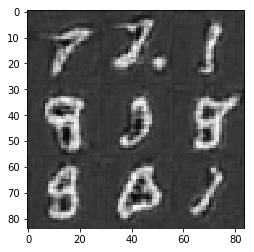

Epoch 1/2... Discriminator Loss: 0.3473... Generator Loss: 4.3930


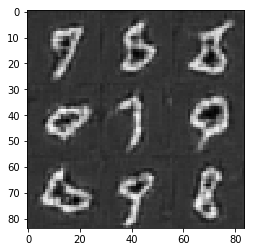

Epoch 2/2... Discriminator Loss: 0.3952... Generator Loss: 2.9013


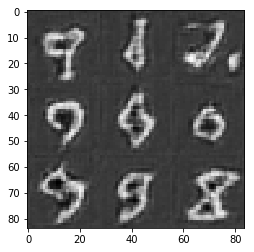

Epoch 2/2... Discriminator Loss: 0.3677... Generator Loss: 3.4986


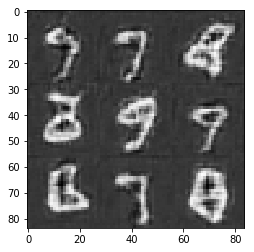

Epoch 2/2... Discriminator Loss: 0.8338... Generator Loss: 3.3604


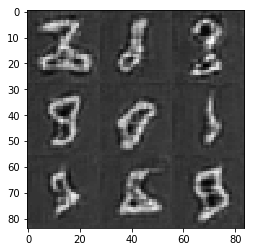

Epoch 2/2... Discriminator Loss: 0.4767... Generator Loss: 2.1811


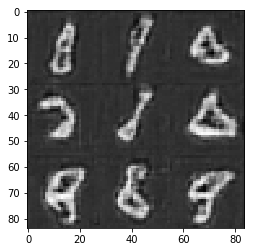

Epoch 2/2... Discriminator Loss: 0.3638... Generator Loss: 3.8382


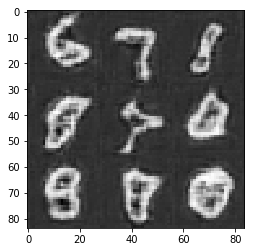

Epoch 2/2... Discriminator Loss: 0.4381... Generator Loss: 2.4765


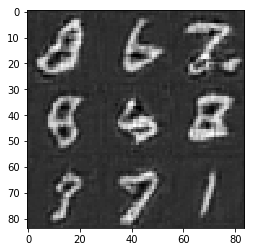

Epoch 2/2... Discriminator Loss: 0.3686... Generator Loss: 3.5403


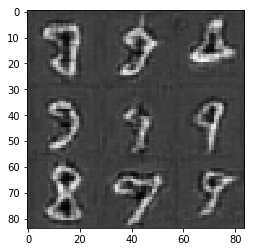

Epoch 2/2... Discriminator Loss: 0.4192... Generator Loss: 3.0059


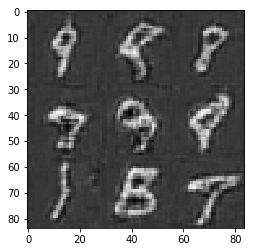

Epoch 2/2... Discriminator Loss: 0.3673... Generator Loss: 4.7695


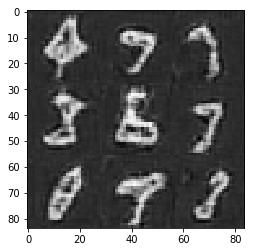

Epoch 2/2... Discriminator Loss: 0.3486... Generator Loss: 4.3310


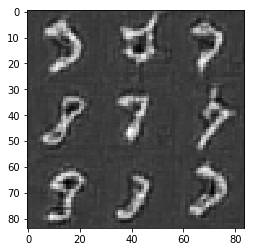

Epoch 2/2... Discriminator Loss: 0.6516... Generator Loss: 2.5259


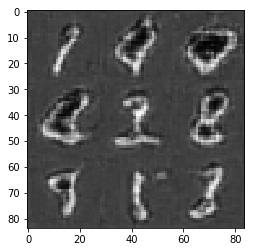

Epoch 2/2... Discriminator Loss: 0.6903... Generator Loss: 1.8674


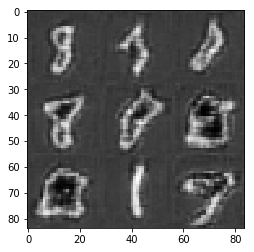

Epoch 2/2... Discriminator Loss: 0.6724... Generator Loss: 2.0992


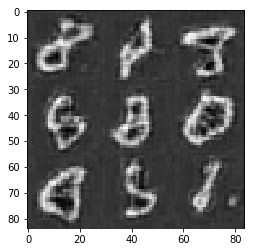

Epoch 2/2... Discriminator Loss: 0.5001... Generator Loss: 2.5748


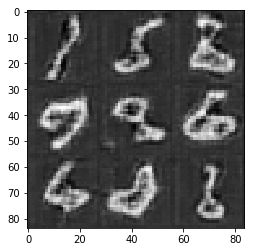

Epoch 2/2... Discriminator Loss: 0.5411... Generator Loss: 2.0354


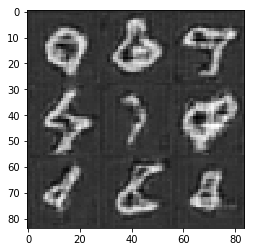

Epoch 2/2... Discriminator Loss: 0.4461... Generator Loss: 2.4601


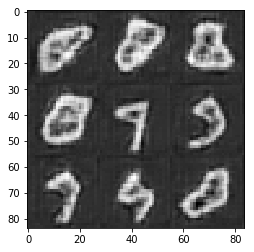

Epoch 2/2... Discriminator Loss: 0.4442... Generator Loss: 2.4394


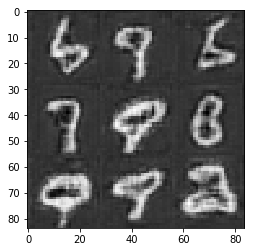

Epoch 2/2... Discriminator Loss: 0.5086... Generator Loss: 2.0329


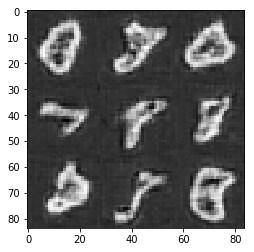

Epoch 2/2... Discriminator Loss: 0.3392... Generator Loss: 5.3710


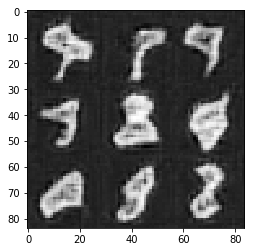

Epoch 2/2... Discriminator Loss: 0.4130... Generator Loss: 2.7930


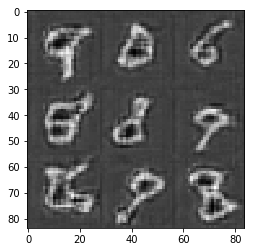

Epoch 2/2... Discriminator Loss: 0.3515... Generator Loss: 4.2640


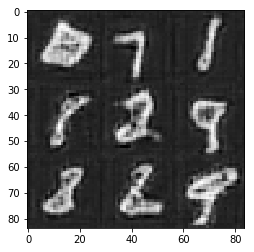

Epoch 2/2... Discriminator Loss: 0.3862... Generator Loss: 3.0369


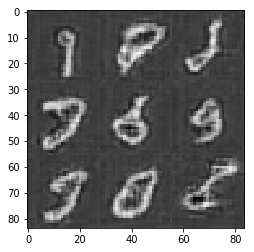

Epoch 2/2... Discriminator Loss: 0.3766... Generator Loss: 3.3467


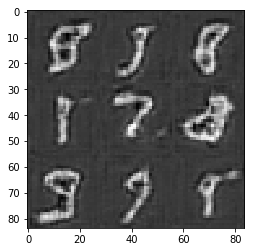

Epoch 2/2... Discriminator Loss: 0.3649... Generator Loss: 3.9520


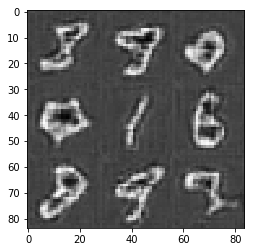

Epoch 2/2... Discriminator Loss: 0.3692... Generator Loss: 3.7163


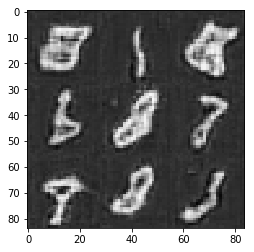

Epoch 2/2... Discriminator Loss: 0.3323... Generator Loss: 6.1813


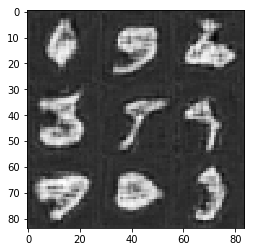

Epoch 2/2... Discriminator Loss: 0.4013... Generator Loss: 2.9389


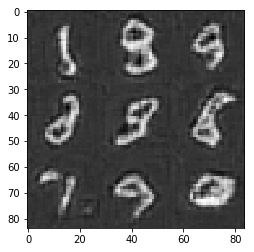

Epoch 2/2... Discriminator Loss: 0.3559... Generator Loss: 4.7864


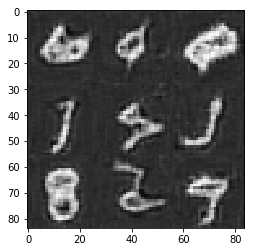

Epoch 2/2... Discriminator Loss: 0.3545... Generator Loss: 4.0583


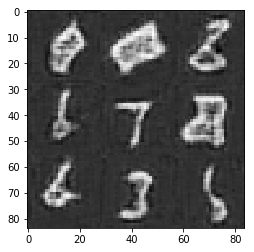

Epoch 2/2... Discriminator Loss: 0.4060... Generator Loss: 2.7811


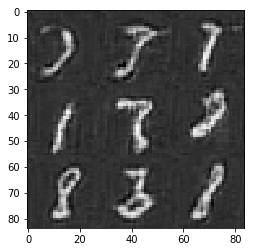

Epoch 2/2... Discriminator Loss: 0.5063... Generator Loss: 3.5444


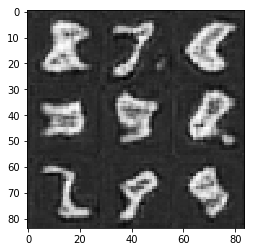

Epoch 2/2... Discriminator Loss: 0.3512... Generator Loss: 4.4888


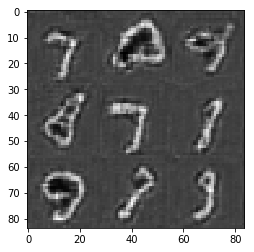

Epoch 2/2... Discriminator Loss: 0.3389... Generator Loss: 5.2864


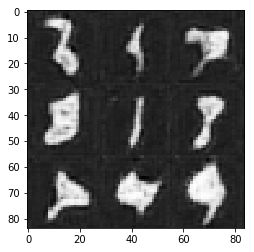

Epoch 2/2... Discriminator Loss: 0.5855... Generator Loss: 1.6015


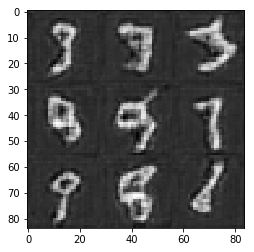

Epoch 2/2... Discriminator Loss: 0.4179... Generator Loss: 2.9504


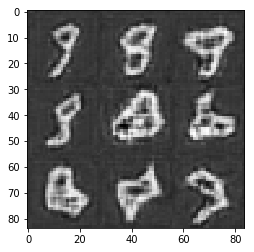

Epoch 2/2... Discriminator Loss: 0.3809... Generator Loss: 3.6600


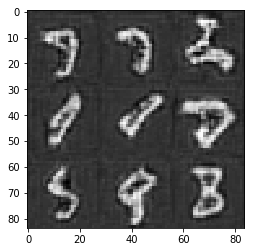

Epoch 2/2... Discriminator Loss: 0.4024... Generator Loss: 2.9039


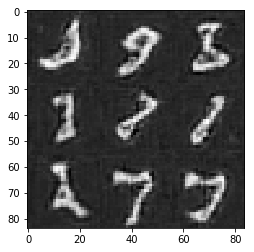

Epoch 2/2... Discriminator Loss: 0.3835... Generator Loss: 3.1559


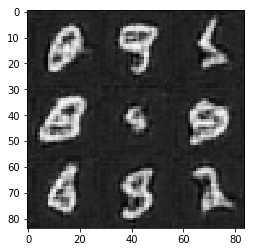

Epoch 2/2... Discriminator Loss: 0.3773... Generator Loss: 3.7515


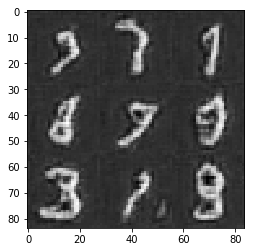

Epoch 2/2... Discriminator Loss: 0.4022... Generator Loss: 2.9052


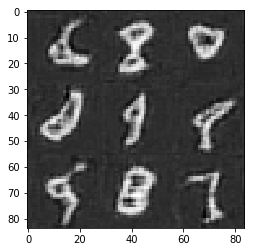

Epoch 2/2... Discriminator Loss: 0.4155... Generator Loss: 2.6448


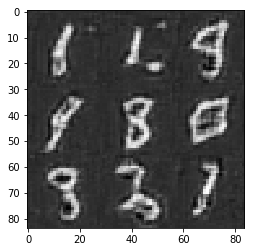

Epoch 2/2... Discriminator Loss: 0.4124... Generator Loss: 3.1800


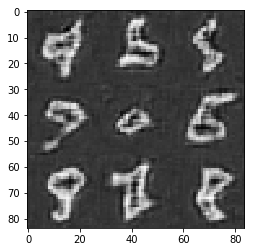

Epoch 2/2... Discriminator Loss: 0.3597... Generator Loss: 3.9709


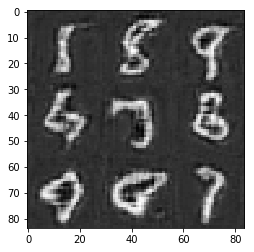

Epoch 2/2... Discriminator Loss: 0.3381... Generator Loss: 5.6878


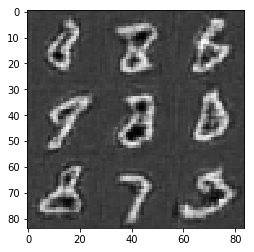

Epoch 2/2... Discriminator Loss: 0.3816... Generator Loss: 3.2261


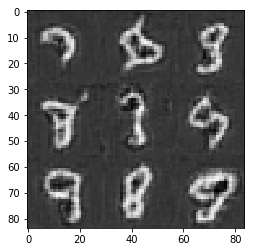

Epoch 2/2... Discriminator Loss: 0.4306... Generator Loss: 2.6610


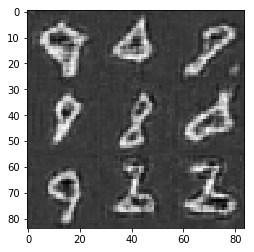

Epoch 2/2... Discriminator Loss: 0.3869... Generator Loss: 2.9946


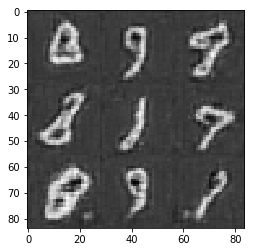

Epoch 2/2... Discriminator Loss: 0.3790... Generator Loss: 3.2046


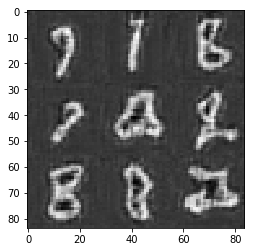

Epoch 2/2... Discriminator Loss: 0.3336... Generator Loss: 6.2417


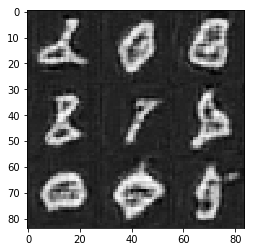

Epoch 2/2... Discriminator Loss: 0.3642... Generator Loss: 3.4870


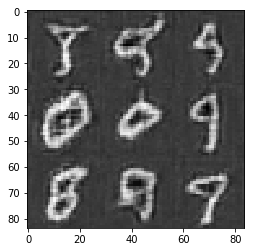

Epoch 2/2... Discriminator Loss: 0.3451... Generator Loss: 4.9190


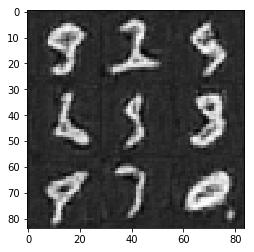

Epoch 2/2... Discriminator Loss: 0.3839... Generator Loss: 3.4581


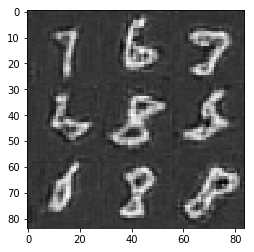

Epoch 2/2... Discriminator Loss: 0.4174... Generator Loss: 2.6359


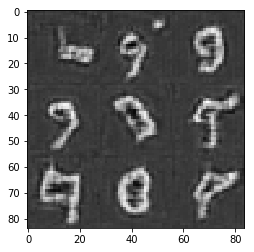

Epoch 2/2... Discriminator Loss: 0.6215... Generator Loss: 1.8348


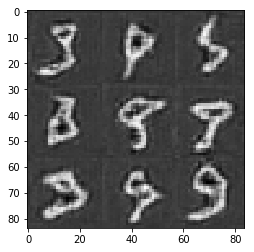

Epoch 2/2... Discriminator Loss: 0.4446... Generator Loss: 2.7251


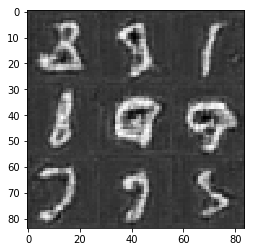

Epoch 2/2... Discriminator Loss: 0.3489... Generator Loss: 4.8191


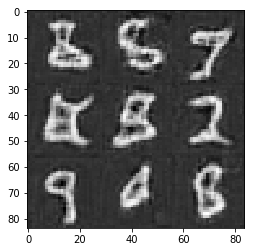

Epoch 2/2... Discriminator Loss: 0.3513... Generator Loss: 5.0969


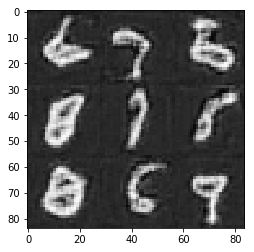

Epoch 2/2... Discriminator Loss: 0.4387... Generator Loss: 2.4063


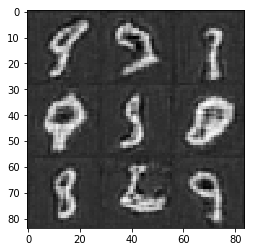

Epoch 2/2... Discriminator Loss: 0.3494... Generator Loss: 4.6243


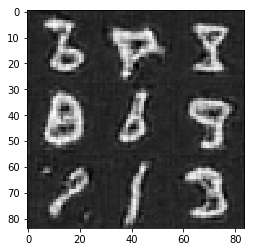

Epoch 2/2... Discriminator Loss: 0.3706... Generator Loss: 3.5833


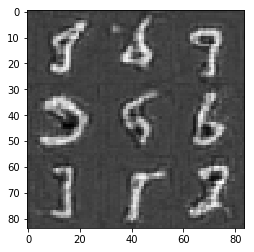

Epoch 2/2... Discriminator Loss: 0.3846... Generator Loss: 5.3623


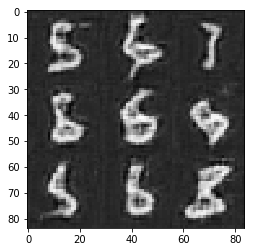

Epoch 2/2... Discriminator Loss: 0.3381... Generator Loss: 5.1547


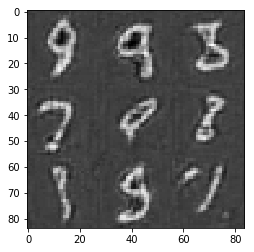

Epoch 2/2... Discriminator Loss: 0.4813... Generator Loss: 2.2530


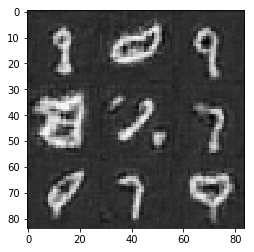

Epoch 2/2... Discriminator Loss: 0.4590... Generator Loss: 2.3932


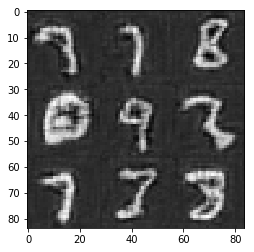

Epoch 2/2... Discriminator Loss: 0.4534... Generator Loss: 2.5273


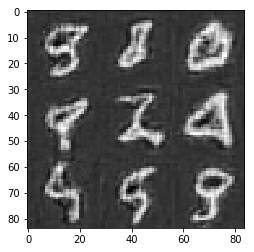

Epoch 2/2... Discriminator Loss: 0.4030... Generator Loss: 2.9935


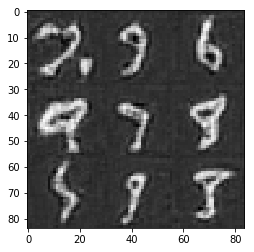

Epoch 2/2... Discriminator Loss: 0.4722... Generator Loss: 2.2232


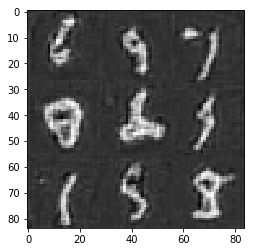

Epoch 2/2... Discriminator Loss: 0.3631... Generator Loss: 3.9914


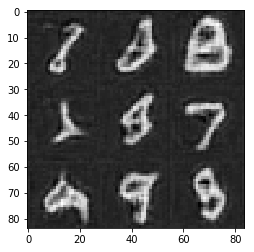

Epoch 2/2... Discriminator Loss: 0.3545... Generator Loss: 4.0916


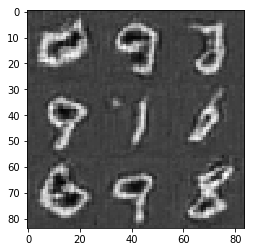

Epoch 2/2... Discriminator Loss: 0.3694... Generator Loss: 3.4256


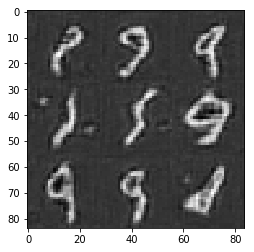

Epoch 2/2... Discriminator Loss: 0.3807... Generator Loss: 5.0612


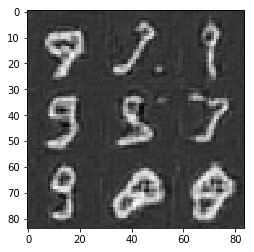

Epoch 2/2... Discriminator Loss: 0.3626... Generator Loss: 3.6144


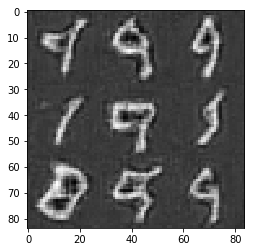

Epoch 2/2... Discriminator Loss: 0.3878... Generator Loss: 3.5008


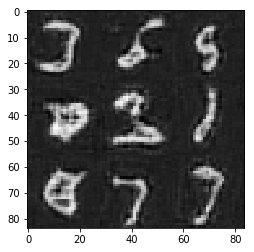

Epoch 2/2... Discriminator Loss: 0.3321... Generator Loss: 5.9625


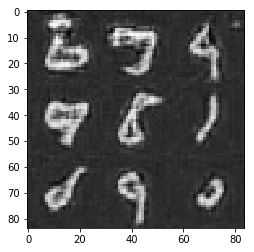

Epoch 2/2... Discriminator Loss: 0.3413... Generator Loss: 4.7355


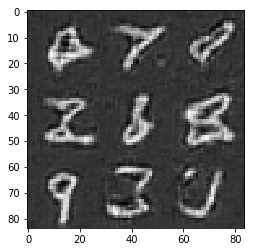

Epoch 2/2... Discriminator Loss: 0.3456... Generator Loss: 5.8564


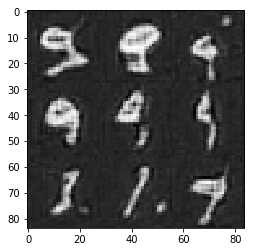

Epoch 2/2... Discriminator Loss: 0.4252... Generator Loss: 2.8039


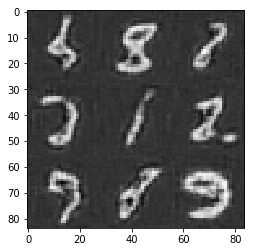

Epoch 2/2... Discriminator Loss: 0.3770... Generator Loss: 3.3131


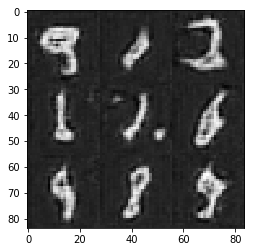

Epoch 2/2... Discriminator Loss: 0.3830... Generator Loss: 4.0033


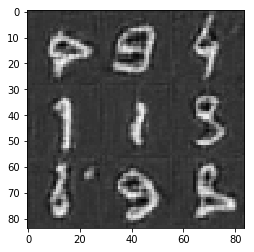

Epoch 2/2... Discriminator Loss: 0.3409... Generator Loss: 4.9335


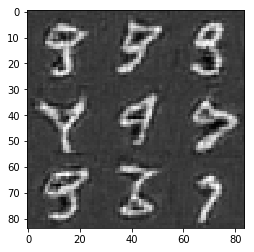

Epoch 2/2... Discriminator Loss: 0.4334... Generator Loss: 4.6997


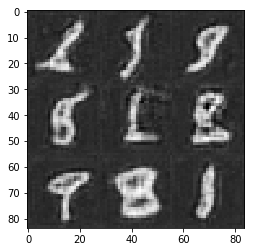

Epoch 2/2... Discriminator Loss: 0.3736... Generator Loss: 3.3672


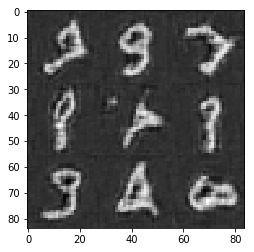

Epoch 2/2... Discriminator Loss: 0.4412... Generator Loss: 2.4299


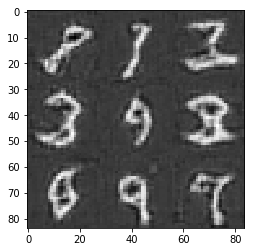

Epoch 2/2... Discriminator Loss: 0.3778... Generator Loss: 3.2868


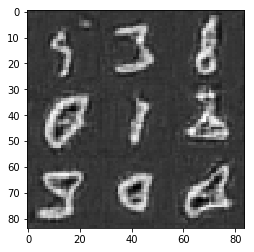

Epoch 2/2... Discriminator Loss: 0.4002... Generator Loss: 2.8187


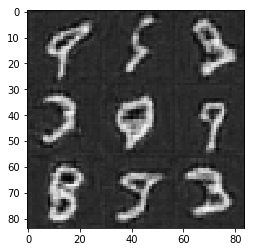

Epoch 2/2... Discriminator Loss: 0.4176... Generator Loss: 2.7452


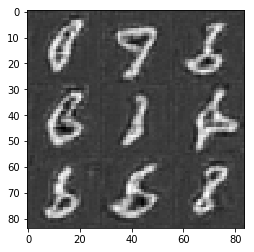

Epoch 2/2... Discriminator Loss: 0.3570... Generator Loss: 3.9876


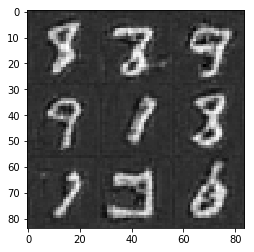

Epoch 2/2... Discriminator Loss: 0.3552... Generator Loss: 4.1138


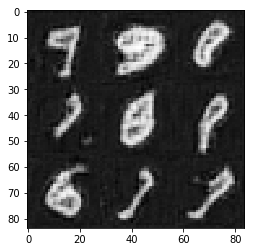

Epoch 2/2... Discriminator Loss: 0.5741... Generator Loss: 2.2641


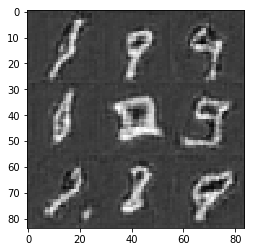

Epoch 2/2... Discriminator Loss: 0.3324... Generator Loss: 8.1667


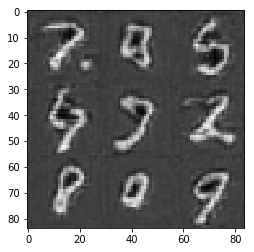

Epoch 2/2... Discriminator Loss: 0.3768... Generator Loss: 3.3485


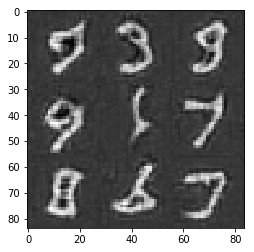

Epoch 2/2... Discriminator Loss: 0.4072... Generator Loss: 3.3824


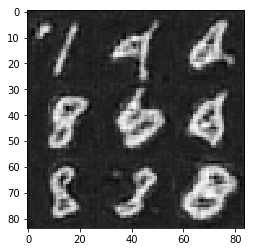

Epoch 2/2... Discriminator Loss: 0.3886... Generator Loss: 3.0340


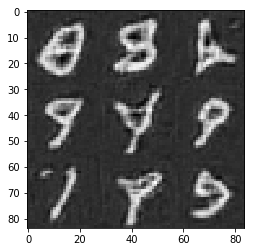

Epoch 2/2... Discriminator Loss: 0.4028... Generator Loss: 4.9979


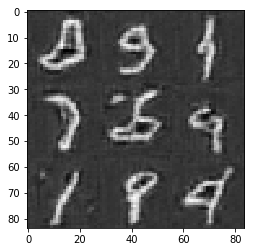

Epoch 2/2... Discriminator Loss: 1.8531... Generator Loss: 4.5775


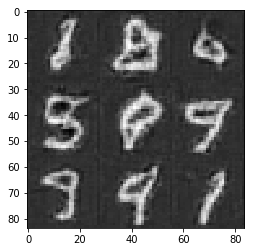

Epoch 2/2... Discriminator Loss: 0.5756... Generator Loss: 1.9526


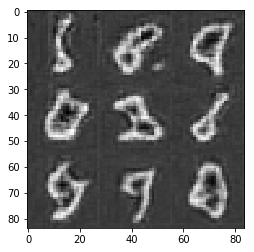

Epoch 2/2... Discriminator Loss: 0.5247... Generator Loss: 1.8859


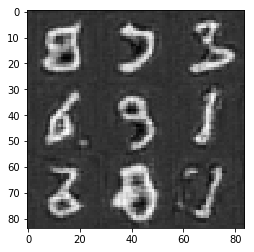

Epoch 2/2... Discriminator Loss: 0.3850... Generator Loss: 3.7355


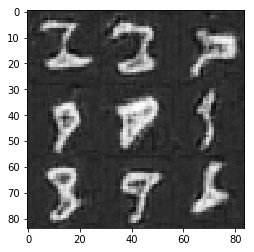

Epoch 2/2... Discriminator Loss: 0.4000... Generator Loss: 3.8368


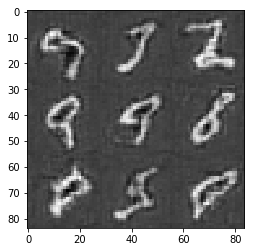

Epoch 2/2... Discriminator Loss: 0.3991... Generator Loss: 3.8203


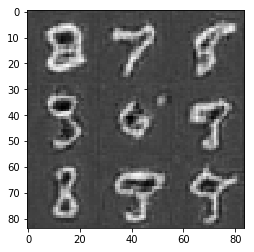

Epoch 2/2... Discriminator Loss: 0.3558... Generator Loss: 3.9989


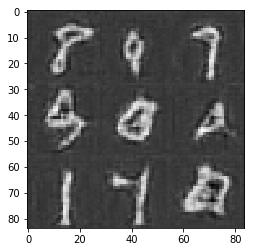

Epoch 2/2... Discriminator Loss: 0.3621... Generator Loss: 3.9033


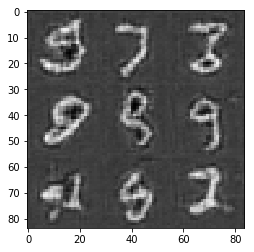

Epoch 2/2... Discriminator Loss: 0.3893... Generator Loss: 3.7584


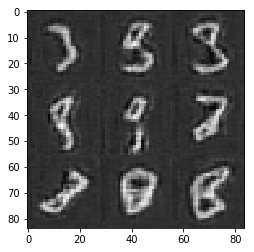

Epoch 2/2... Discriminator Loss: 0.4356... Generator Loss: 2.5141


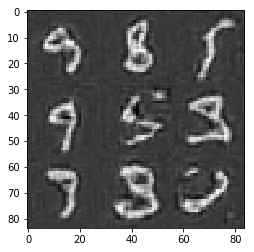

Epoch 2/2... Discriminator Loss: 0.4374... Generator Loss: 2.4687


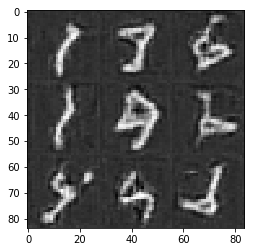

Epoch 2/2... Discriminator Loss: 0.3741... Generator Loss: 3.8185


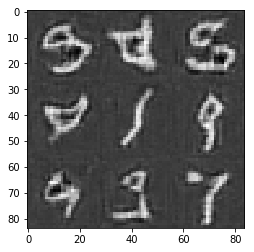

Epoch 2/2... Discriminator Loss: 0.3641... Generator Loss: 3.5367


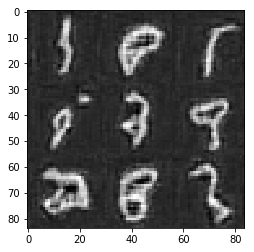

Epoch 2/2... Discriminator Loss: 0.3429... Generator Loss: 5.0345


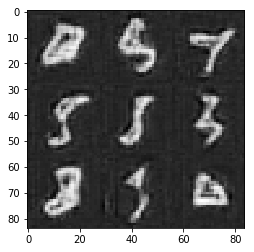

Epoch 2/2... Discriminator Loss: 0.3546... Generator Loss: 3.9947


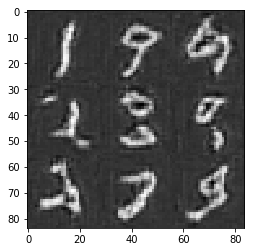

Epoch 2/2... Discriminator Loss: 0.4181... Generator Loss: 2.6584


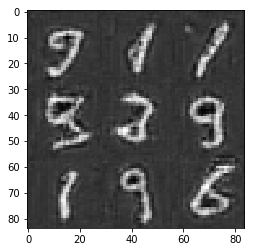

Epoch 2/2... Discriminator Loss: 0.3429... Generator Loss: 4.9958


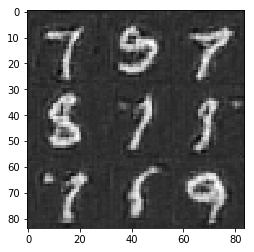

Epoch 2/2... Discriminator Loss: 0.4556... Generator Loss: 2.2973


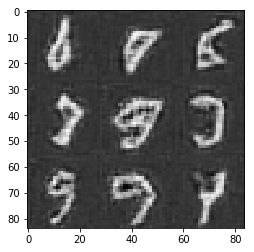

Epoch 2/2... Discriminator Loss: 0.4780... Generator Loss: 2.2313


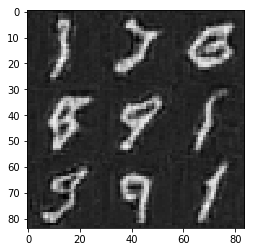

Epoch 2/2... Discriminator Loss: 0.5043... Generator Loss: 1.9986


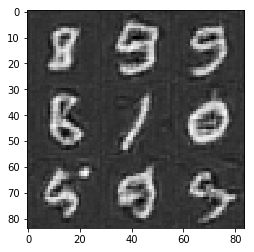

Epoch 2/2... Discriminator Loss: 0.5245... Generator Loss: 2.1345


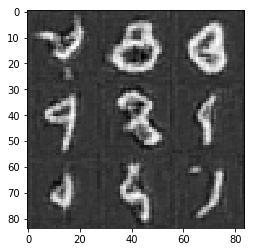

Epoch 2/2... Discriminator Loss: 0.8534... Generator Loss: 1.1098


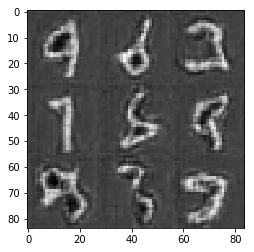

Epoch 2/2... Discriminator Loss: 0.3550... Generator Loss: 4.8327


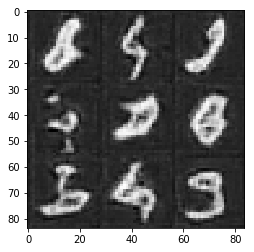

Epoch 2/2... Discriminator Loss: 0.3793... Generator Loss: 3.5764


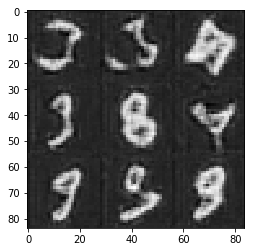

Epoch 2/2... Discriminator Loss: 0.3546... Generator Loss: 4.1506


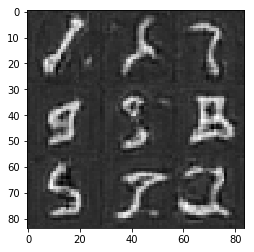

Epoch 2/2... Discriminator Loss: 0.3609... Generator Loss: 3.8032


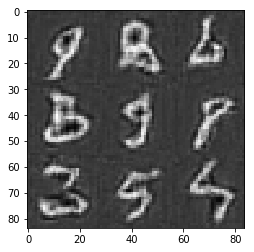

Epoch 2/2... Discriminator Loss: 0.4251... Generator Loss: 2.6033


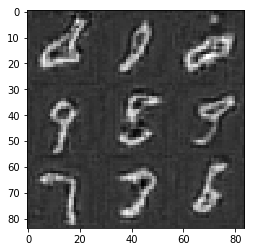

Epoch 2/2... Discriminator Loss: 1.2031... Generator Loss: 0.8437


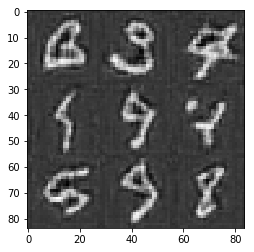

Epoch 2/2... Discriminator Loss: 0.4195... Generator Loss: 2.9254


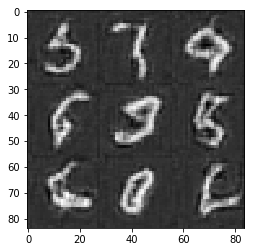

Epoch 2/2... Discriminator Loss: 0.3476... Generator Loss: 4.5978


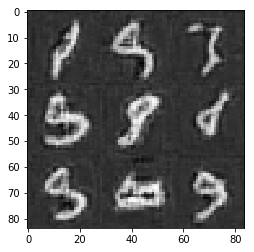

Epoch 2/2... Discriminator Loss: 0.3442... Generator Loss: 4.9390


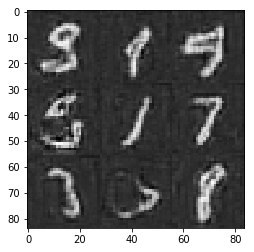

Epoch 2/2... Discriminator Loss: 0.3367... Generator Loss: 6.6486


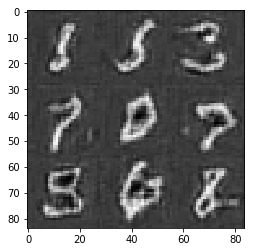

Epoch 2/2... Discriminator Loss: 0.3535... Generator Loss: 4.2178


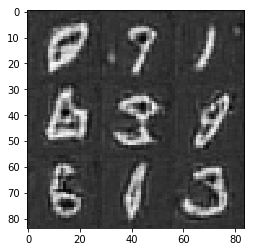

Epoch 2/2... Discriminator Loss: 0.4897... Generator Loss: 2.6166


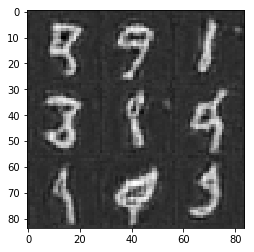

Epoch 2/2... Discriminator Loss: 0.3526... Generator Loss: 3.9049


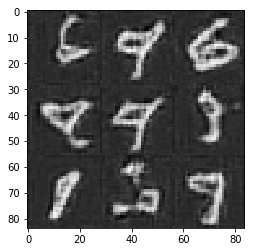

Epoch 2/2... Discriminator Loss: 0.3786... Generator Loss: 3.2445


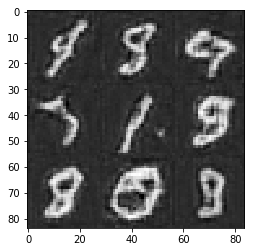

Epoch 2/2... Discriminator Loss: 0.3996... Generator Loss: 2.8946


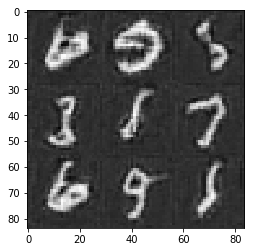

Epoch 2/2... Discriminator Loss: 0.3404... Generator Loss: 5.1604


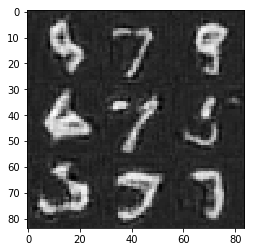

Epoch 2/2... Discriminator Loss: 0.3355... Generator Loss: 5.1247


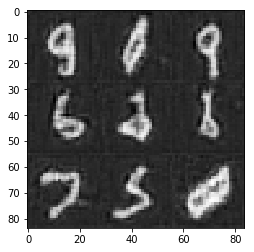

Epoch 2/2... Discriminator Loss: 0.3706... Generator Loss: 3.4447


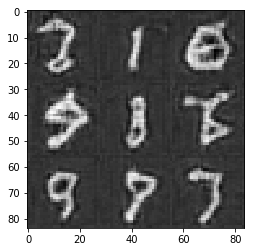

Epoch 2/2... Discriminator Loss: 0.3627... Generator Loss: 5.0205


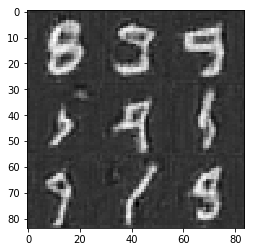

Epoch 2/2... Discriminator Loss: 0.4983... Generator Loss: 2.3400


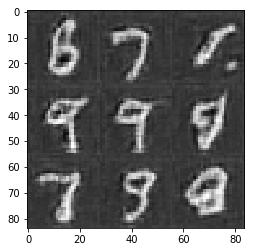

Epoch 2/2... Discriminator Loss: 0.4307... Generator Loss: 2.7770


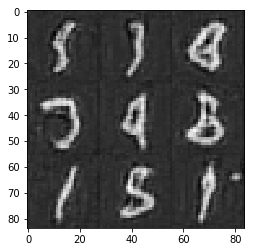

Epoch 2/2... Discriminator Loss: 0.3701... Generator Loss: 3.6506


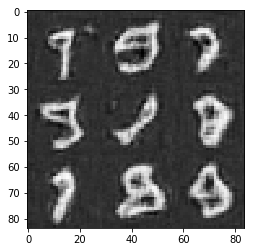

Epoch 2/2... Discriminator Loss: 0.3401... Generator Loss: 5.5759


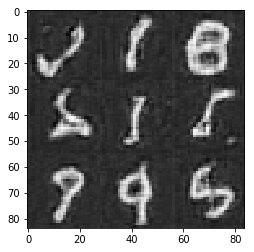

Epoch 2/2... Discriminator Loss: 0.3846... Generator Loss: 4.2050


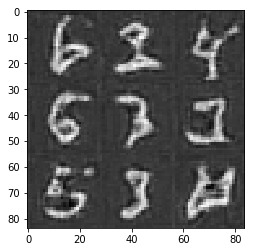

Epoch 2/2... Discriminator Loss: 0.3492... Generator Loss: 6.9837


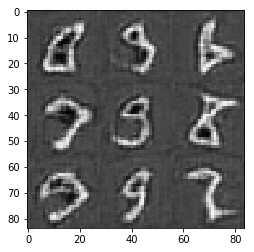

Epoch 2/2... Discriminator Loss: 0.4285... Generator Loss: 2.4930


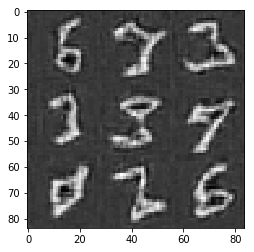

Epoch 2/2... Discriminator Loss: 0.4174... Generator Loss: 2.7054


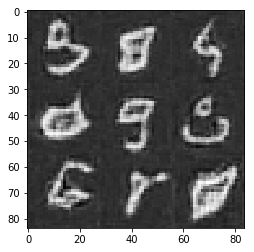

Epoch 2/2... Discriminator Loss: 0.5041... Generator Loss: 3.4875


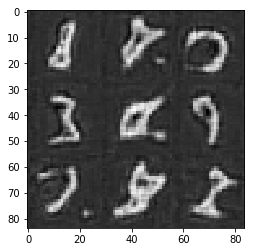

Epoch 2/2... Discriminator Loss: 0.4185... Generator Loss: 2.9190


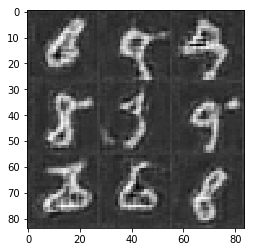

Epoch 2/2... Discriminator Loss: 0.4146... Generator Loss: 3.3273


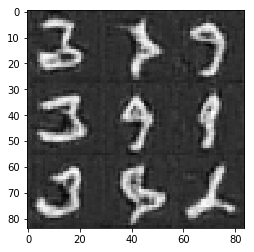

Epoch 2/2... Discriminator Loss: 0.3601... Generator Loss: 5.9592


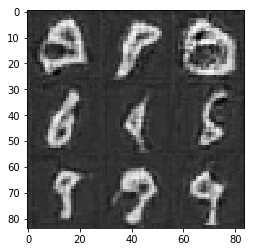

Epoch 2/2... Discriminator Loss: 0.4431... Generator Loss: 2.4239


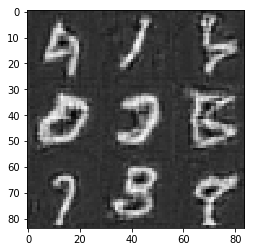

Epoch 2/2... Discriminator Loss: 0.3814... Generator Loss: 3.2597


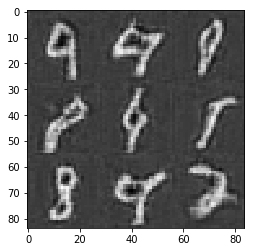

Epoch 2/2... Discriminator Loss: 0.3575... Generator Loss: 4.3239


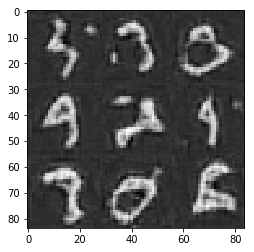

Epoch 2/2... Discriminator Loss: 0.3351... Generator Loss: 5.5540


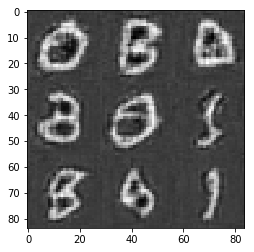

Epoch 2/2... Discriminator Loss: 0.3581... Generator Loss: 3.8130


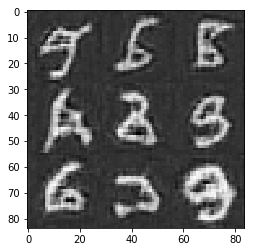

Epoch 2/2... Discriminator Loss: 0.3535... Generator Loss: 3.9247


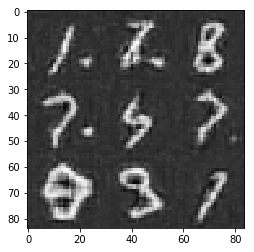

Epoch 2/2... Discriminator Loss: 0.3590... Generator Loss: 3.9314


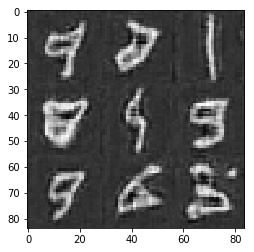

Epoch 2/2... Discriminator Loss: 0.3432... Generator Loss: 4.7053


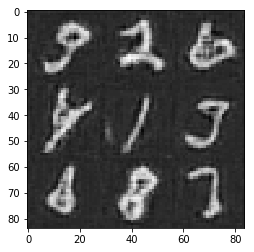

Epoch 2/2... Discriminator Loss: 0.4713... Generator Loss: 2.2046


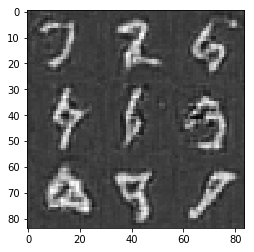

Epoch 2/2... Discriminator Loss: 0.3329... Generator Loss: 6.5911


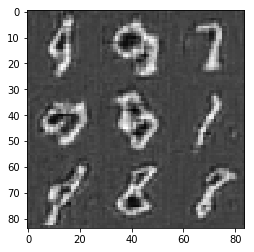

Epoch 2/2... Discriminator Loss: 0.5633... Generator Loss: 2.7257


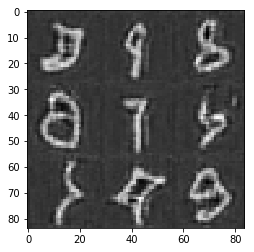

Epoch 2/2... Discriminator Loss: 0.4642... Generator Loss: 2.5446


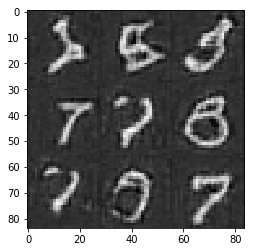

Epoch 2/2... Discriminator Loss: 0.3410... Generator Loss: 5.0205


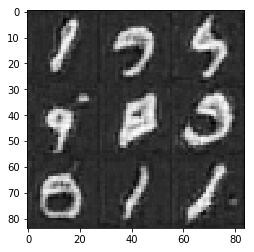

Epoch 2/2... Discriminator Loss: 0.3879... Generator Loss: 3.1300


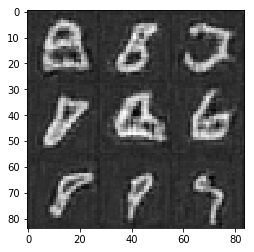

Epoch 2/2... Discriminator Loss: 0.3578... Generator Loss: 3.8938


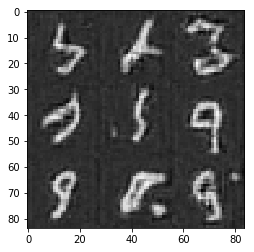

Epoch 2/2... Discriminator Loss: 0.3435... Generator Loss: 5.8608


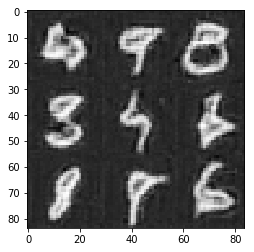

Epoch 2/2... Discriminator Loss: 0.3798... Generator Loss: 3.2110


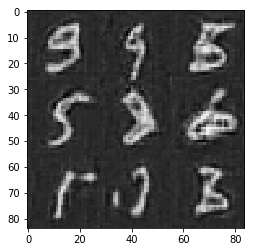

Epoch 2/2... Discriminator Loss: 0.3431... Generator Loss: 4.5113


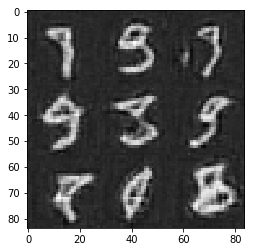

Epoch 2/2... Discriminator Loss: 1.2809... Generator Loss: 0.6012


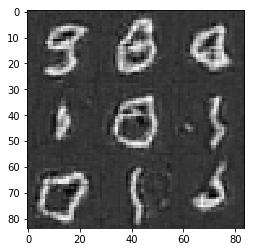

Epoch 2/2... Discriminator Loss: 0.5347... Generator Loss: 2.0670


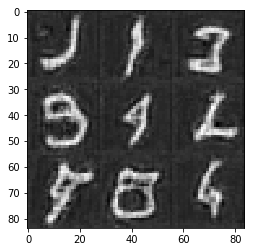

Epoch 2/2... Discriminator Loss: 0.3531... Generator Loss: 4.7167


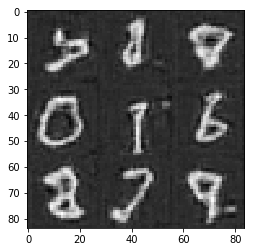

Epoch 2/2... Discriminator Loss: 0.3725... Generator Loss: 3.6443


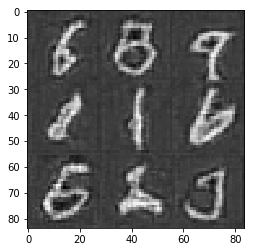

Epoch 2/2... Discriminator Loss: 0.4013... Generator Loss: 3.0402


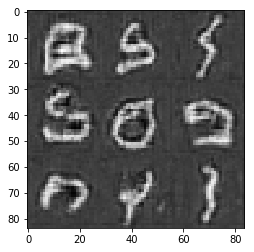

Epoch 2/2... Discriminator Loss: 0.3564... Generator Loss: 5.7648


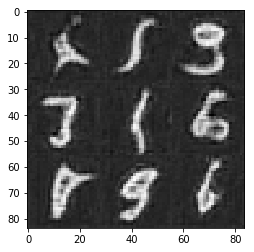

Epoch 2/2... Discriminator Loss: 2.8317... Generator Loss: 0.2157


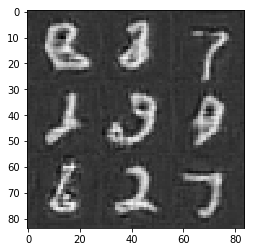

Epoch 2/2... Discriminator Loss: 0.5992... Generator Loss: 1.7186


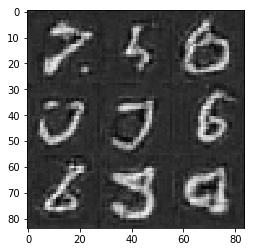

Epoch 2/2... Discriminator Loss: 0.4100... Generator Loss: 3.7985


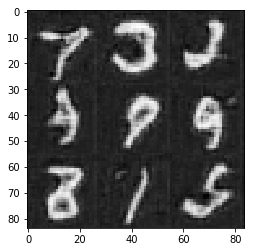

Epoch 2/2... Discriminator Loss: 0.4288... Generator Loss: 2.7488


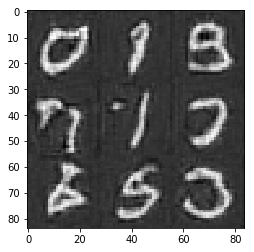

Epoch 2/2... Discriminator Loss: 0.3857... Generator Loss: 3.3237


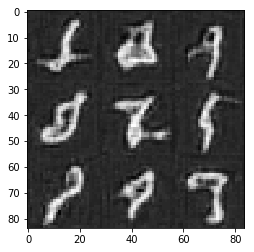

Epoch 2/2... Discriminator Loss: 0.4466... Generator Loss: 2.6340


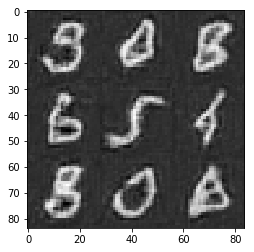

Epoch 2/2... Discriminator Loss: 0.3752... Generator Loss: 3.3566


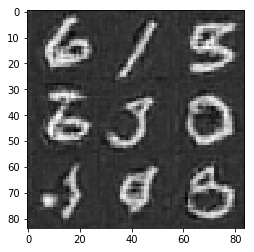

Epoch 2/2... Discriminator Loss: 0.3360... Generator Loss: 6.6412


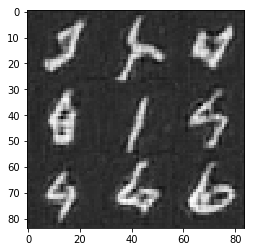

Epoch 2/2... Discriminator Loss: 0.3390... Generator Loss: 5.3320


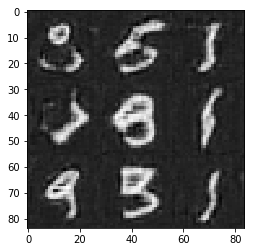

Epoch 2/2... Discriminator Loss: 0.3527... Generator Loss: 4.3171


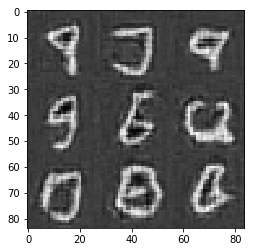

Epoch 2/2... Discriminator Loss: 0.4366... Generator Loss: 2.5147


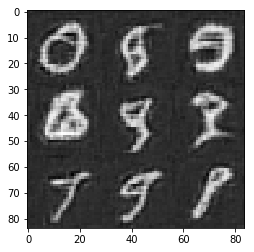

Epoch 2/2... Discriminator Loss: 0.3873... Generator Loss: 3.2076


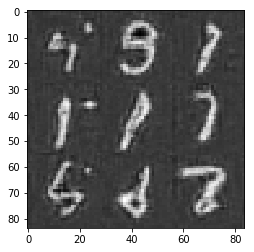

Epoch 2/2... Discriminator Loss: 0.3983... Generator Loss: 2.9657


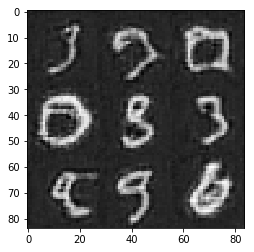

Epoch 2/2... Discriminator Loss: 0.5805... Generator Loss: 1.6658


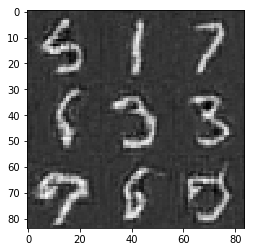

Epoch 2/2... Discriminator Loss: 0.3640... Generator Loss: 3.7034


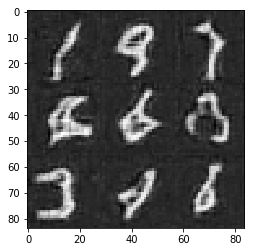

Epoch 2/2... Discriminator Loss: 0.3431... Generator Loss: 4.5137


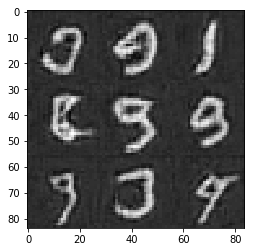

Epoch 2/2... Discriminator Loss: 0.3697... Generator Loss: 3.6065


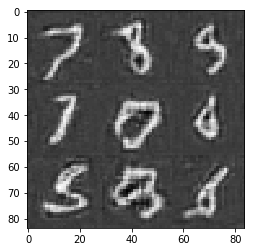

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = 100
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.